In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [3]:
#  pd.read_csv('data/2019-Nov.csv', skiprows = 시작 행, nrows= 행의 수)
# 결측치, 중복 데이터 제거된 파일
df = pd.read_parquet("df_smartphone_5G.gzip")
df.shape

(11466744, 7)

In [4]:
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11466744 entries, 0 to 11507230
Data columns (total 7 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    category           
 2   product_id    uint64             
 3   brand         object             
 4   price         float64            
 5   user_id       uint64             
 6   user_session  object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(2), uint64(2)
memory usage: 623.3+ MB


None

,event_time,event_type,product_id,brand,price,user_id,user_session
0,2019-10-01 00:00:04+00:00,view,1004237,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
1,2019-10-01 00:00:11+00:00,view,1004545,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
2,2019-10-01 00:00:11+00:00,view,1005011,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
3,2019-10-01 00:00:19+00:00,view,1005135,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
4,2019-10-01 00:00:20+00:00,view,1003306,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f


In [5]:
df["event_time_Month"] = df["event_time"].dt.month
df["event_time_Day"] = df["event_time"].dt.day
df["event_time_dow"] = df["event_time"].dt.dayofweek
df["event_time_Time"] = df["event_time"].dt.time
df["event_time_Hour"] = df["event_time"].dt.hour

In [6]:
df.tail()

,event_time,event_type,product_id,brand,price,user_id,user_session,event_time_Month,event_time_Day,event_time_dow,event_time_Time,event_time_Hour
11507225,2019-10-31 23:59:52+00:00,view,1002524,apple,531.26,565404816,d9cf0ac4-c3ec-4e1f-83aa-326b1e7b1581,10,31,3,23:59:52,23
11507226,2019-10-31 23:59:53+00:00,view,1004708,huawei,151.99,566031393,8fbc7d60-6ae5-41c9-985c-cee9c52ab9ae,10,31,3,23:59:53,23
11507228,2019-10-31 23:59:56+00:00,view,1005008,xiaomi,94.46,557202408,2169c430-9acc-4db8-8061-ac70ff0c66ea,10,31,3,23:59:56,23
11507229,2019-10-31 23:59:56+00:00,view,1003936,xiaomi,437.33,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,10,31,3,23:59:56,23
11507230,2019-10-31 23:59:58+00:00,view,1004870,samsung,275.25,518956209,6764041a-9285-4869-8a32-a79adf31d212,10,31,3,23:59:58,23


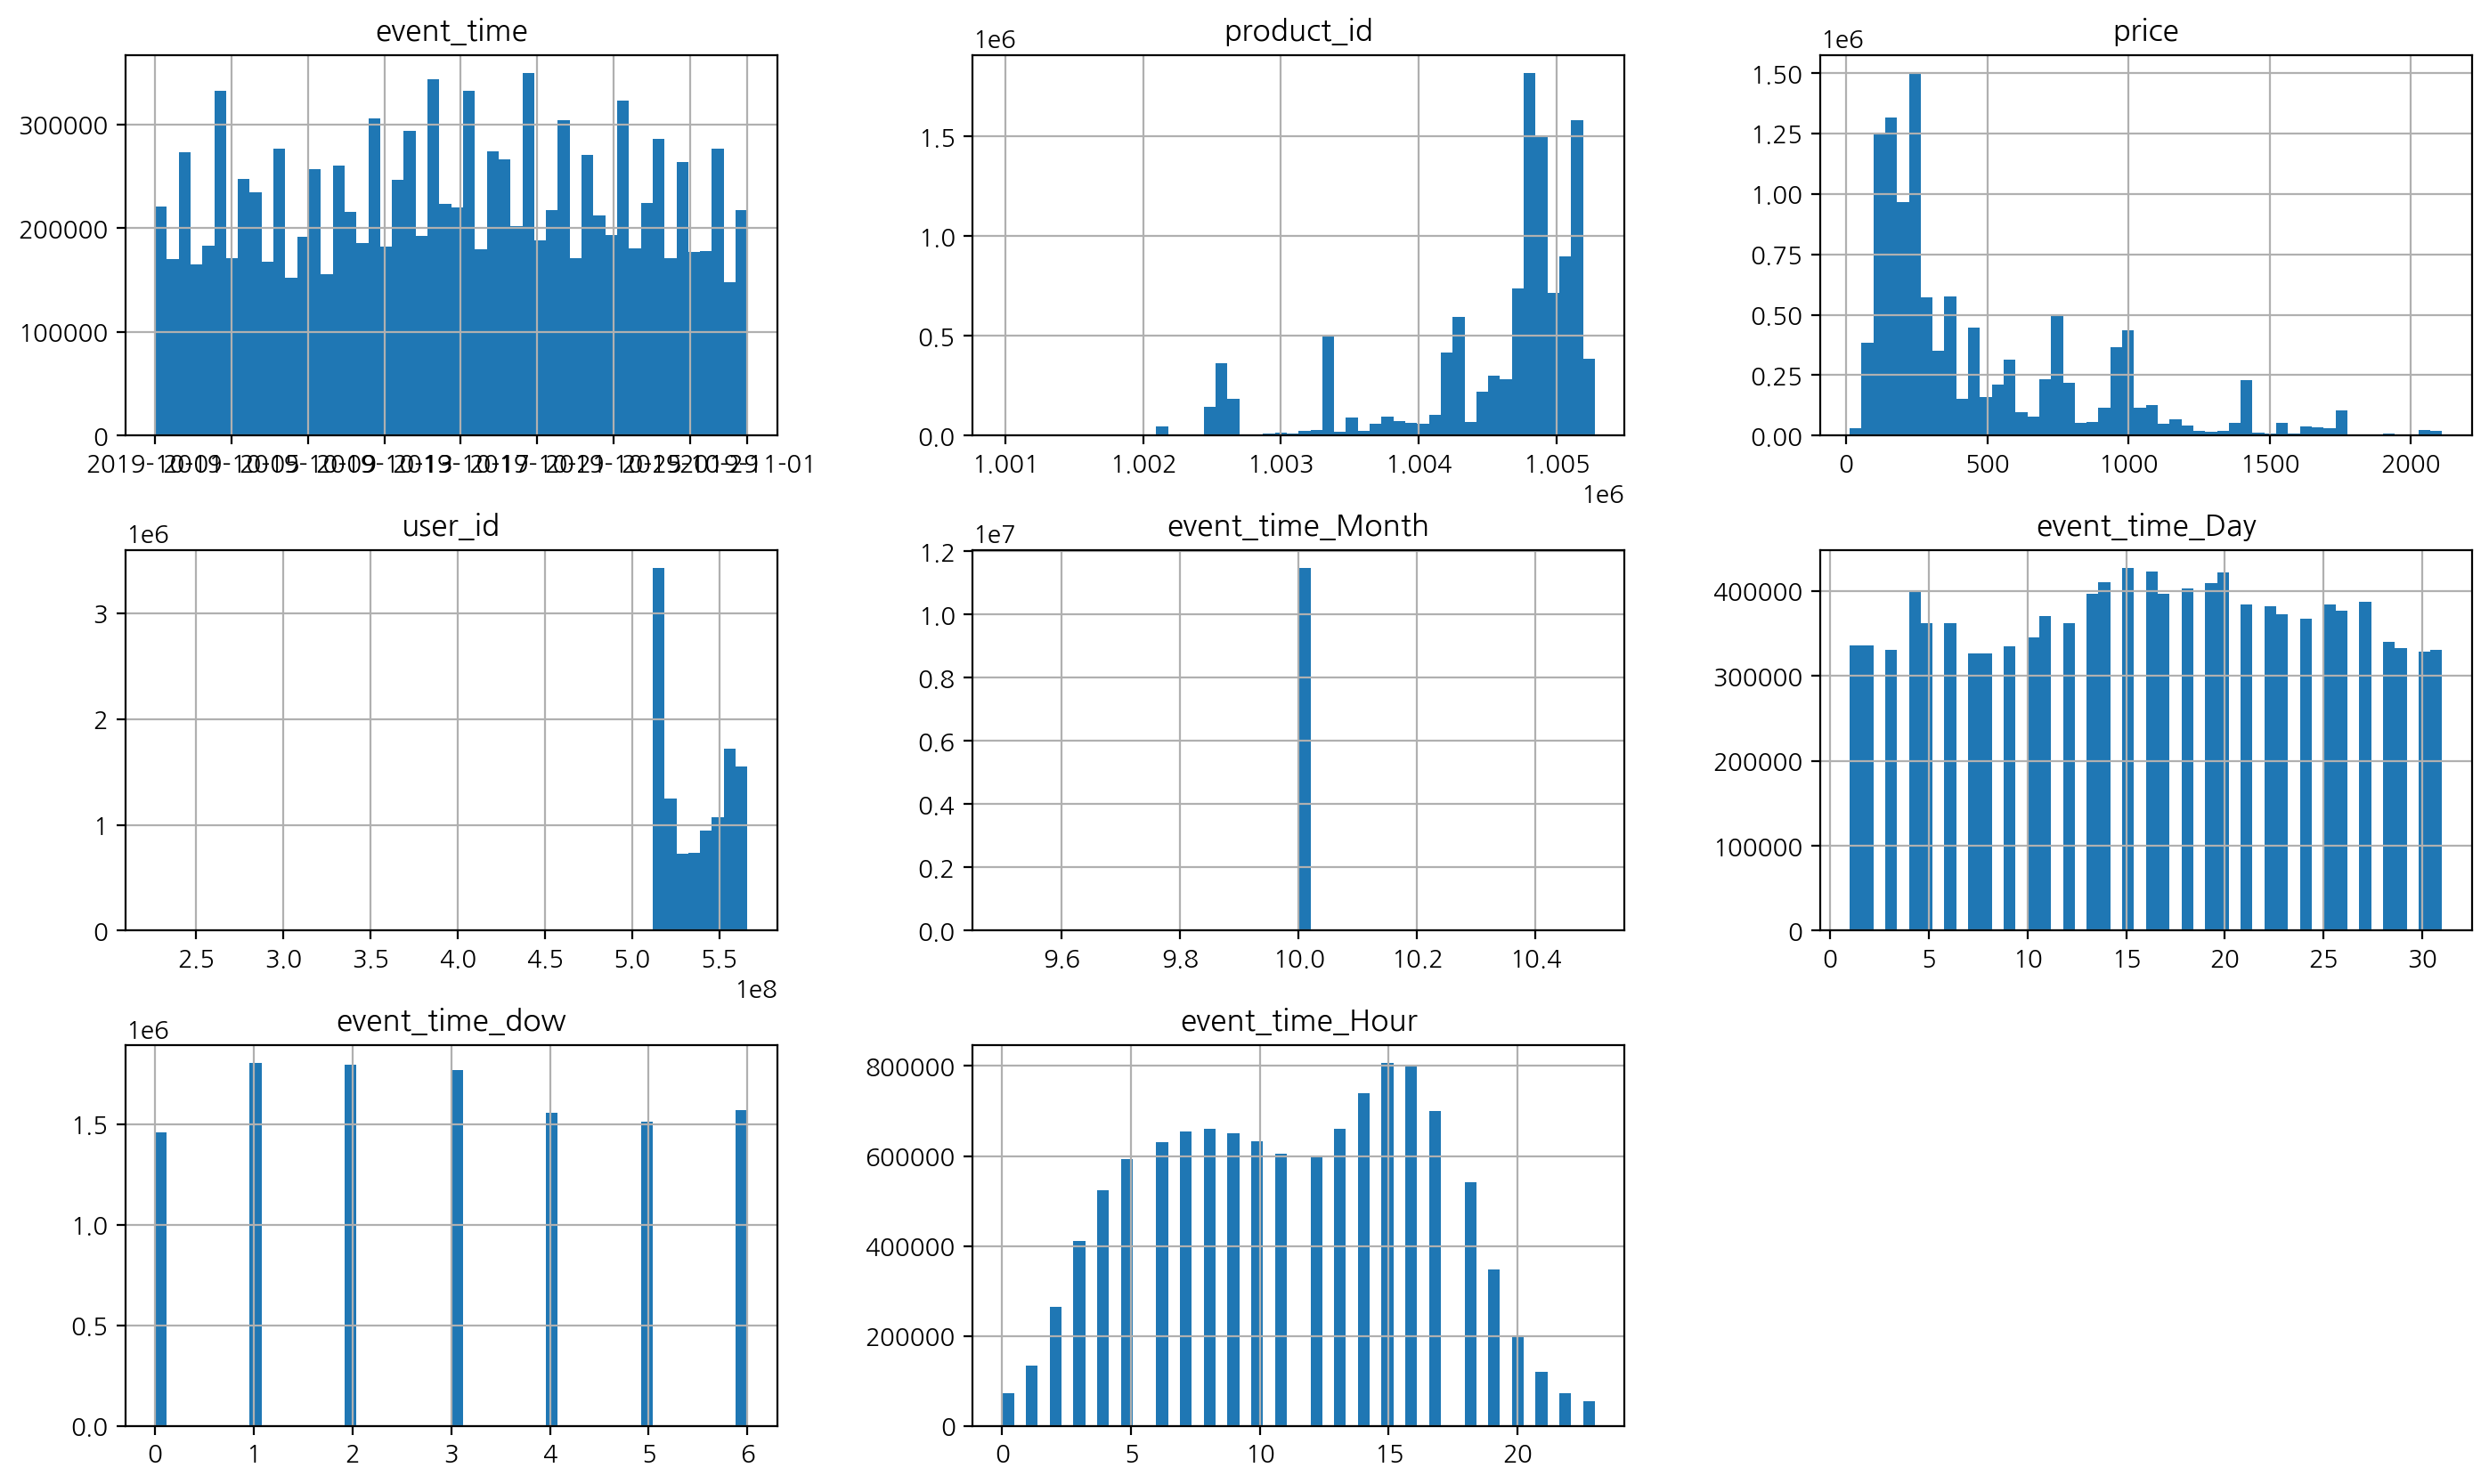

In [7]:
# hist 로 전체 수치 변수의 히스토그램을 시각화
df.hist(bins=50, figsize=(17,10));

In [8]:
df["brand"].unique()

array(['apple', 'huawei', 'samsung', 'xiaomi', 'nokia', 'oneplus', 'oppo',
       'bq', 'fly', 'meizu', 'vivo', 'doogee', 'sony', 'asus', 'lg',
       'honor', 'tp-link', 'jinga', 'gionee', 'google', 'prestigio',
       'blackberry', 'tecno', 'haier', 'nubia', 'ark', 'irbis', 'inoi',
       'zte', 'texet', 'philips', 'htc', 'micromax', 'vertex', 'leagoo',
       'hiper', 'leeco', 'motorola', 'bravis', 'oukitel', 'umi'],
      dtype=object)

## Apple에 관심있는 사람들

In [9]:
apple = df[df["brand"] == "apple"]
apple = apple.reset_index()
apple = apple.drop(["brand", "index"], axis=1)
apple.head(2)

,event_time,event_type,product_id,price,user_id,user_session,event_time_Month,event_time_Day,event_time_dow,event_time_Time,event_time_Hour
0,2019-10-01 00:00:04+00:00,view,1004237,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,10,1,1,00:00:04,0
1,2019-10-01 00:00:19+00:00,view,1005135,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,10,1,1,00:00:19,0


In [10]:
# 애플 구매한 사람
apple_purc = apple[apple["event_type"] == "purchase"]

In [11]:
apple_purc = apple_purc.drop("event_type", axis=1)

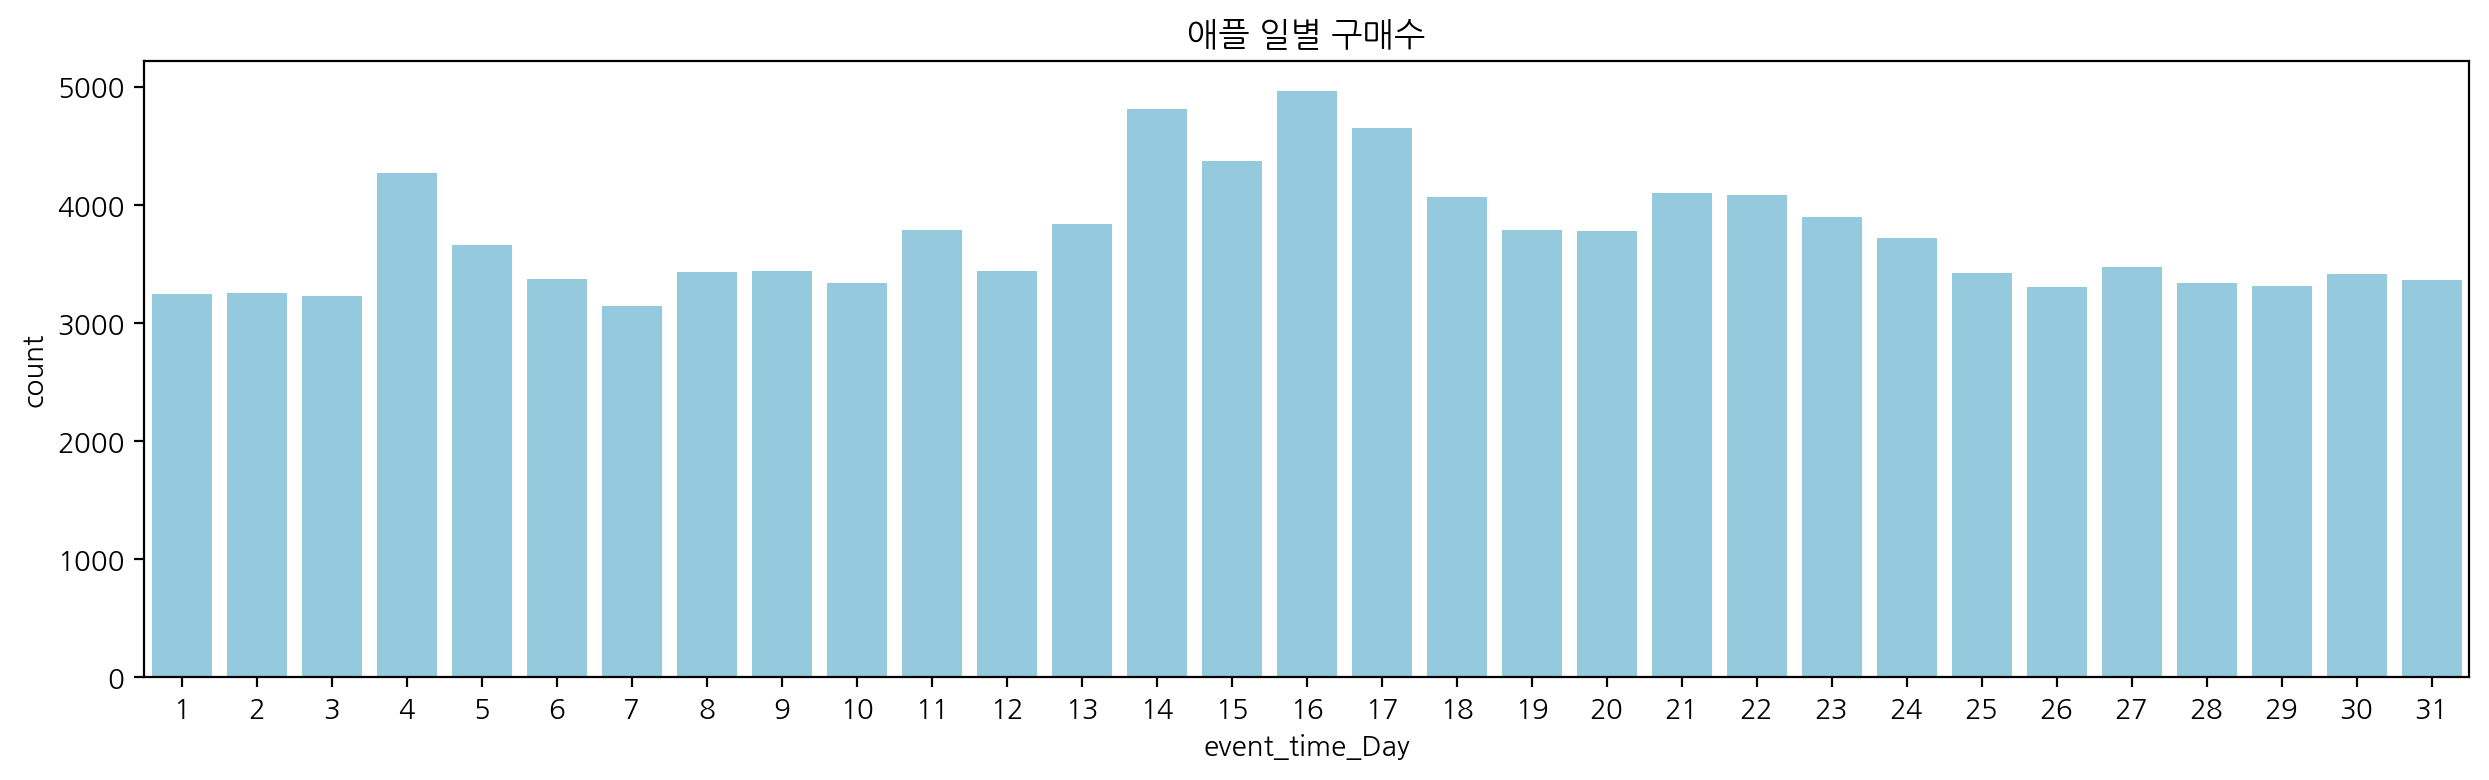

In [12]:
# 일별 구매 빈도수
plt.figure(figsize=(15, 4))
sns.countplot(data=apple_purc, x="event_time_Day", color="skyblue")
plt.title("애플 일별 구매수");

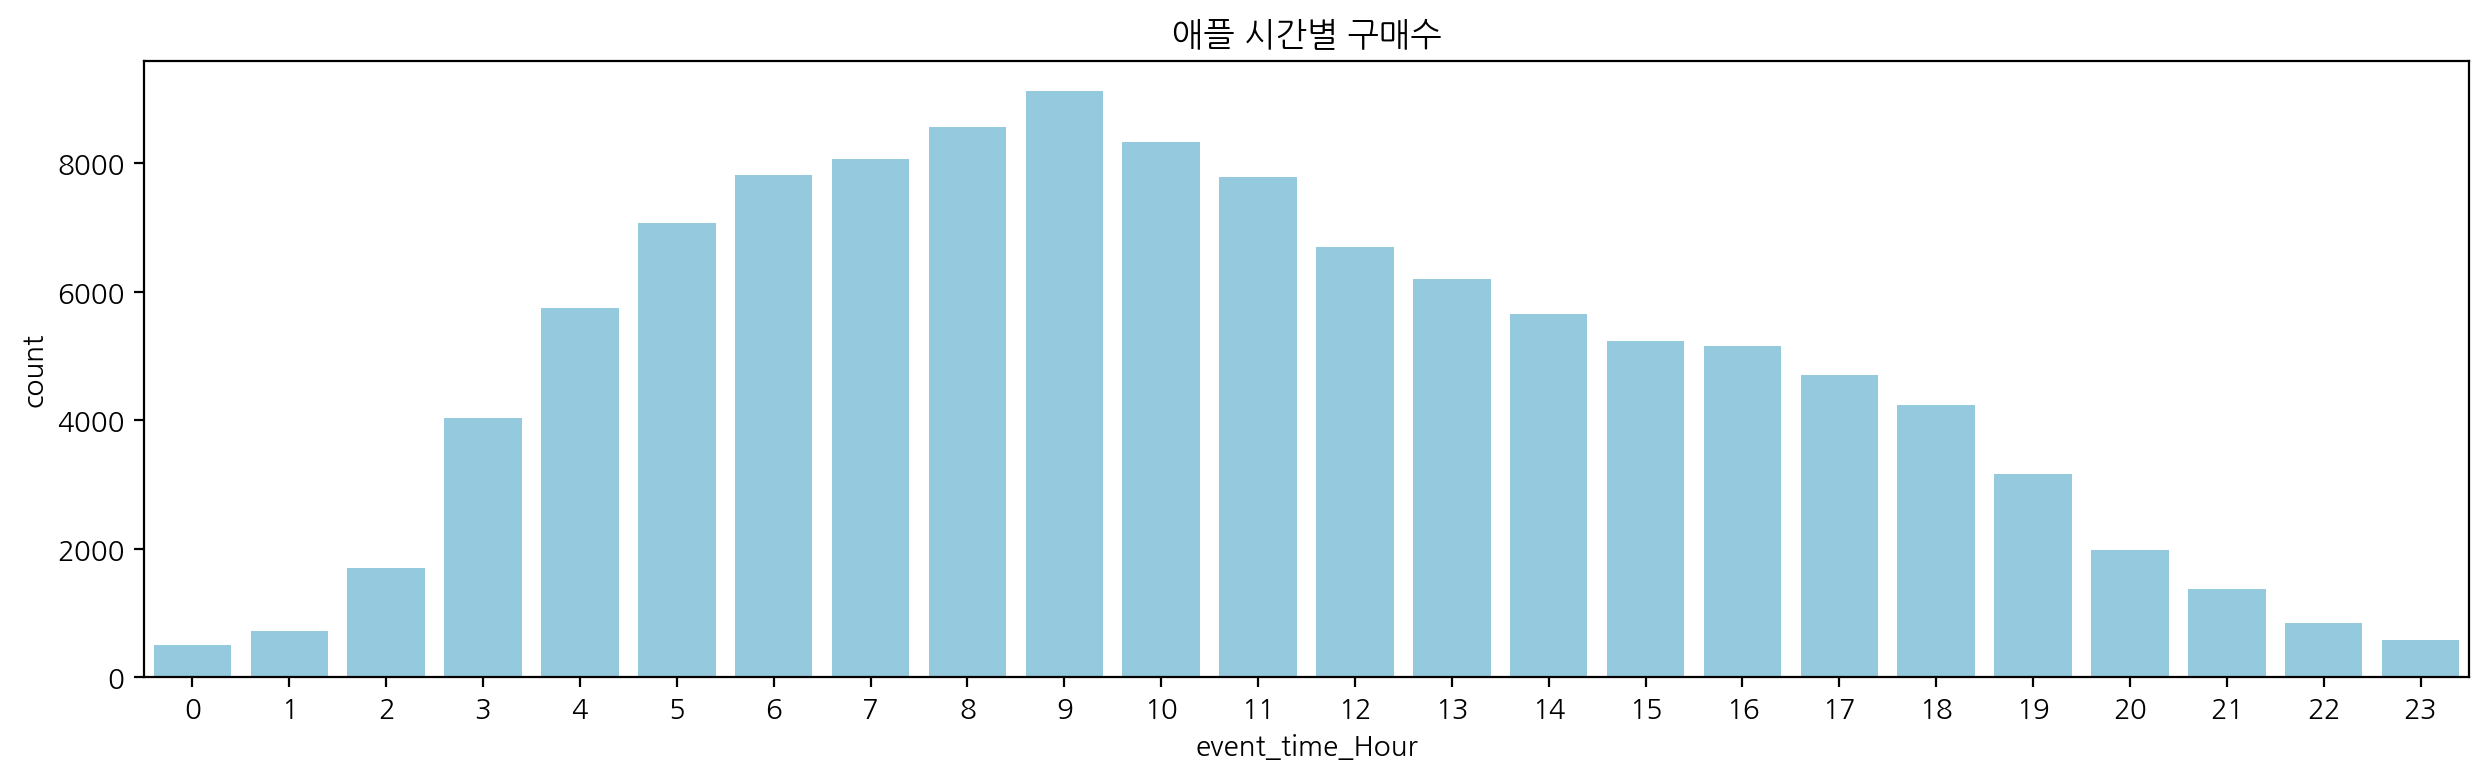

In [13]:
# 시간별 구매 빈도수
plt.figure(figsize=(15, 4))
sns.countplot(data=apple_purc, x="event_time_Hour", color="skyblue")
plt.title("애플 시간별 구매수");

In [14]:
day_name =  [w for w in "월화수목금토일"] 
apple_purc_dow_count = apple_purc["event_time_dow"].value_counts().sort_index()
apple_purc_dow_count.index = day_name
apple_purc_dow_count

월    15395
화    18451
수    18974
목    18298
금    15551
토    14197
일    14468
Name: event_time_dow, dtype: int64

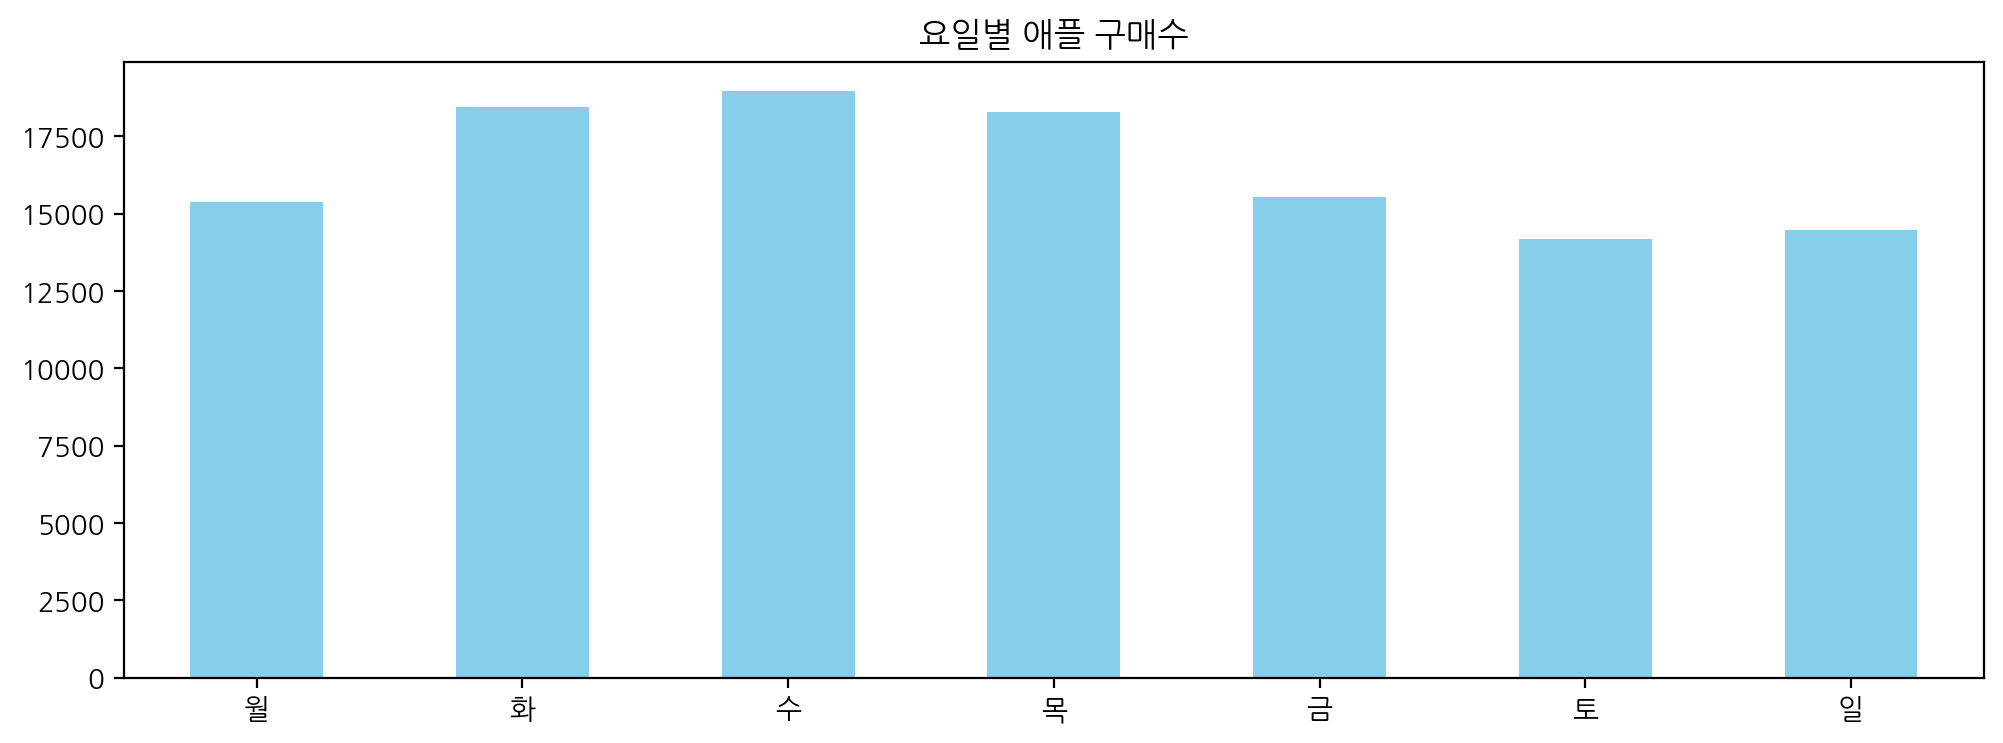

In [15]:
# 요일별 애플 구매수
plt.figure(figsize=(12, 4))
apple_purc_dow_count.plot.bar(rot=0,  color="skyblue");
plt.title("요일별 애플 구매수");

## 삼성에 관심있는 사람들

In [18]:
samsung = df[df["brand"] == "samsung"]
samsung = samsung.reset_index()
samsung = samsung.drop(["brand", "index"], axis=1)
samsung.head(2)

,event_time,event_type,product_id,price,user_id,user_session,event_time_Month,event_time_Day,event_time_dow,event_time_Time,event_time_Hour
0,2019-10-01 00:00:11+00:00,view,1005011,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101,10,1,1,00:00:11,0
1,2019-10-01 00:00:36+00:00,view,1004767,254.82,512558158,9a206ba2-37c7-4354-9d31-37ff3bb297ed,10,1,1,00:00:36,0


In [19]:
samsung_purc = samsung[samsung["event_type"] == "purchase"]
samsung_purc = samsung_purc.drop("event_type", axis=1)

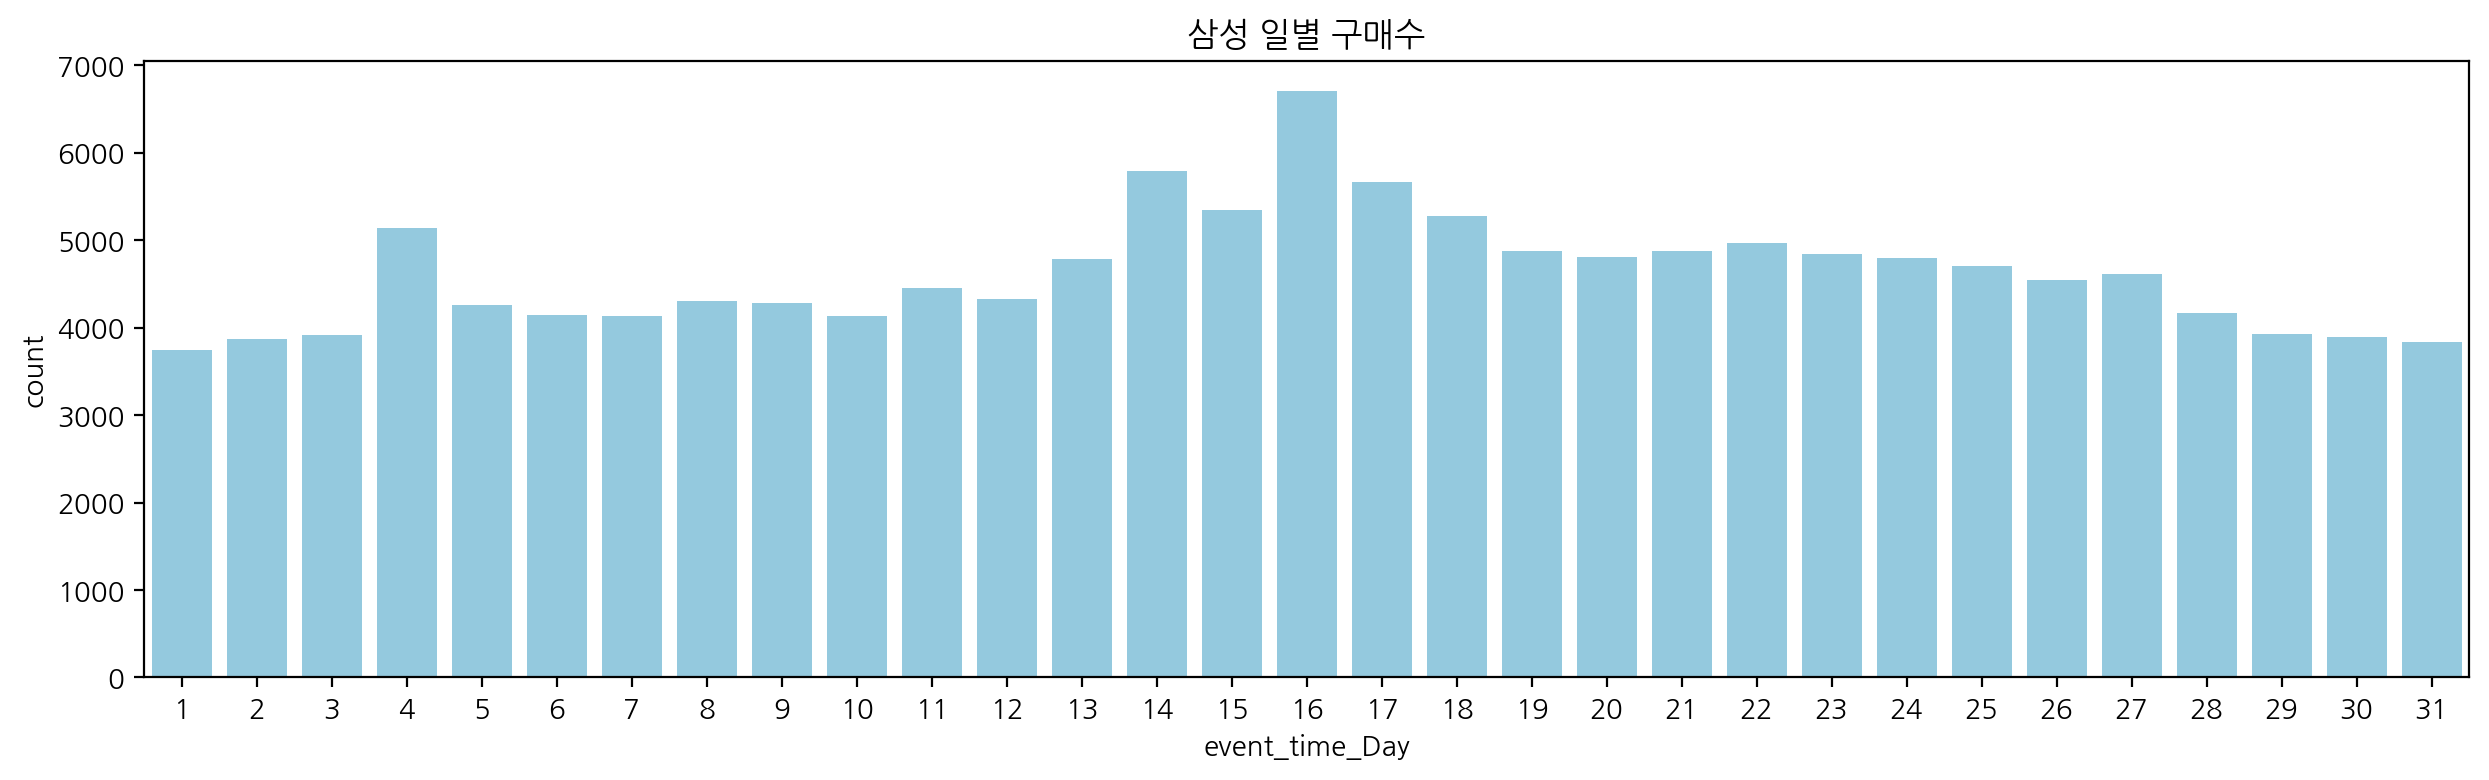

In [20]:
# 일별 구매 빈도수
plt.figure(figsize=(15, 4))
sns.countplot(data=samsung_purc, x="event_time_Day", color="skyblue")
plt.title("삼성 일별 구매수");

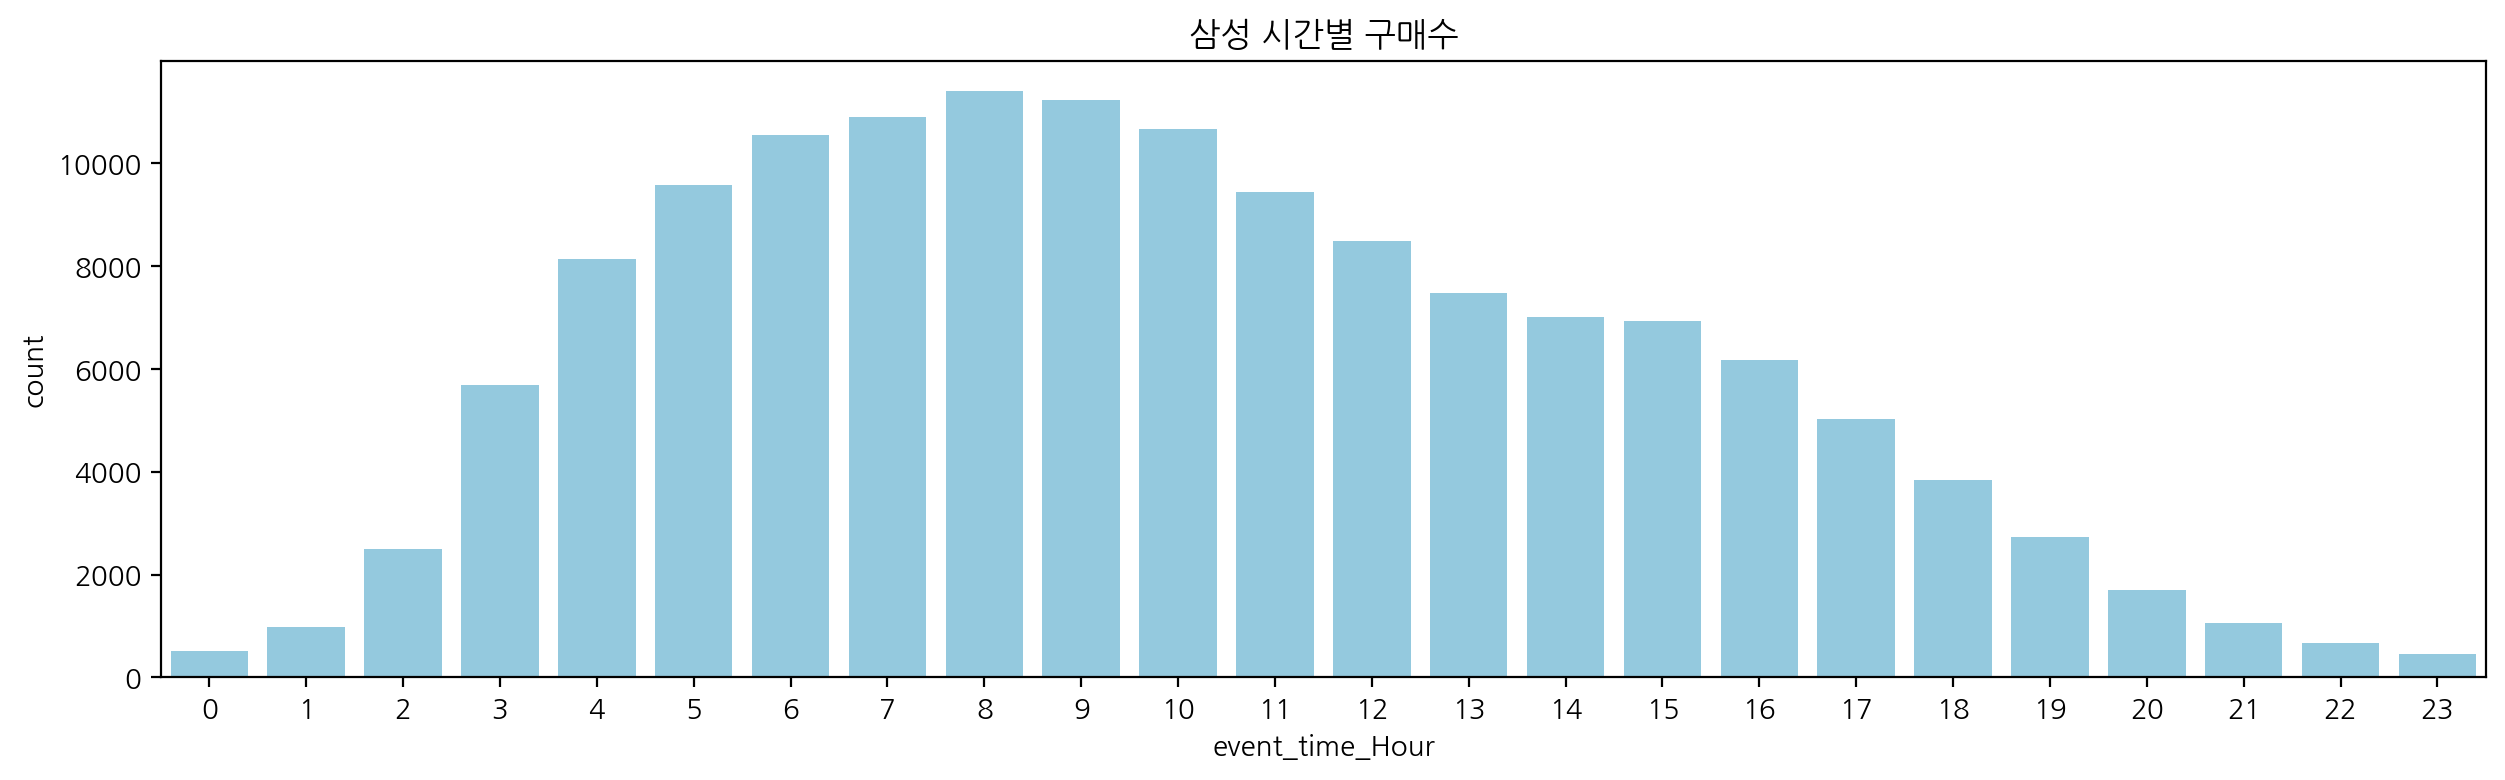

In [21]:
# 시간별 구매 빈도수
plt.figure(figsize=(15, 4))
sns.countplot(data=samsung_purc, x="event_time_Hour", color="skyblue")
plt.title("삼성 시간별 구매수");

In [22]:
samsung_purc_dow_count = samsung_purc["event_time_dow"].value_counts().sort_index()
samsung_purc_dow_count.index = day_name
samsung_purc_dow_count

월    18959
화    22286
수    23593
목    22346
금    19571
토    18009
일    18344
Name: event_time_dow, dtype: int64

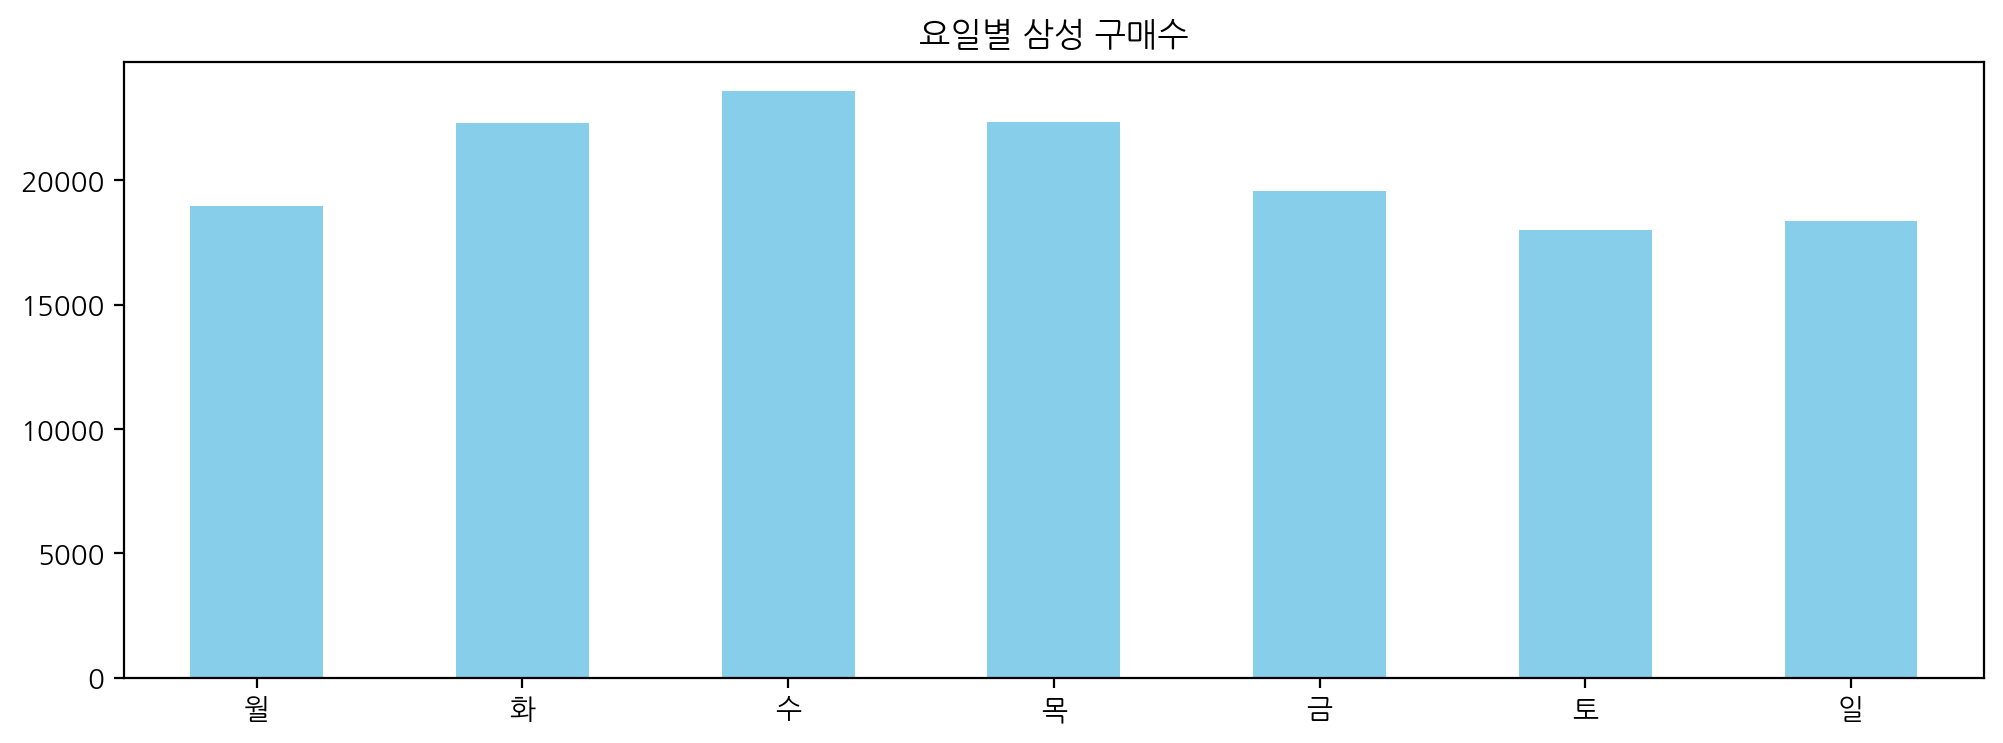

In [23]:
# 요일별 애플 구매수
plt.figure(figsize=(12, 4))
samsung_purc_dow_count.plot.bar(rot=0,  color="skyblue");
plt.title("요일별 삼성 구매수");

## 삼성과 애플 동시에 비교하기

In [24]:
all_pur = df[((df["brand"] == "apple") | (df["brand"] == "samsung")) 
             & (df["event_type"] == "purchase")]
all_pur = all_pur.drop("event_type", axis=1)
print(all_pur.shape)
all_pur.head()

(258442, 11)


,event_time,product_id,brand,price,user_id,user_session,event_time_Month,event_time_Day,event_time_dow,event_time_Time,event_time_Hour
48,2019-10-01 00:02:14+00:00,1004856,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,10,1,1,00:02:14,0
84,2019-10-01 00:04:37+00:00,1002532,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,10,1,1,00:04:37,0
162,2019-10-01 00:10:08+00:00,1002524,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,10,1,1,00:10:08,0
469,2019-10-01 02:19:10+00:00,1004246,apple,736.18,515246296,b7dbae4f-cad3-463e-89ce-41990cf48dea,10,1,1,02:19:10,2
497,2019-10-01 02:19:34+00:00,1005104,apple,975.57,555160488,a1395546-c124-456c-9752-0f5cf883c63d,10,1,1,02:19:34,2


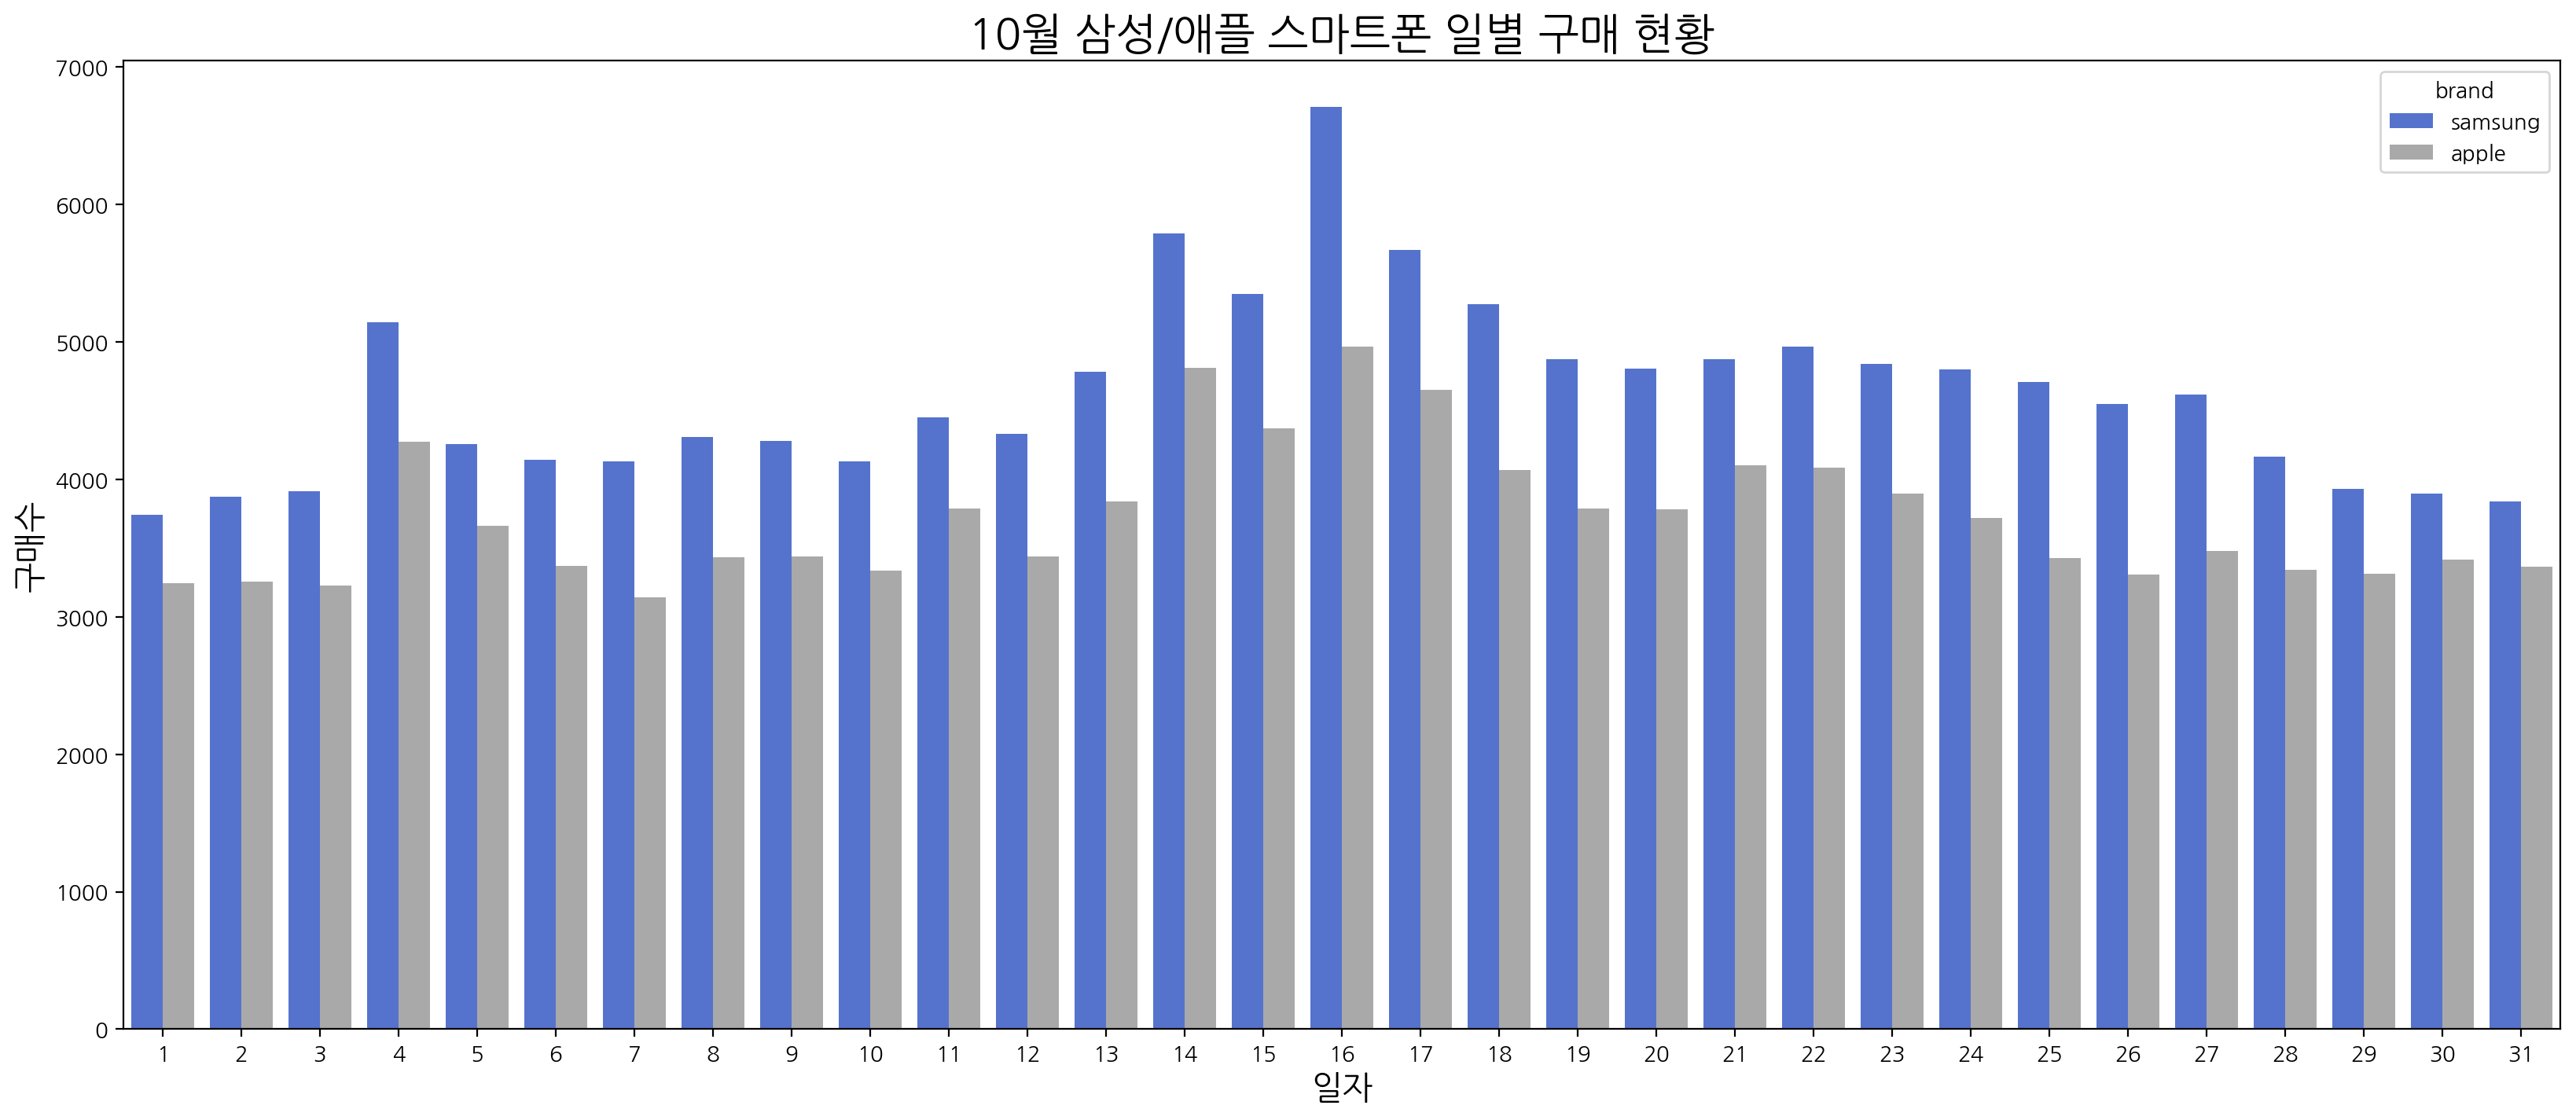

In [25]:
plt.figure(figsize=(20, 8))
colors = ["#4169E1", "#A9A9A9"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(data=all_pur, x="event_time_Day", hue="brand")
plt.title("10월 삼성/애플 스마트폰 일별 구매 현황", fontsize=20)
plt.xlabel('일자', fontsize=15)
plt.ylabel('구매수', fontsize=15);

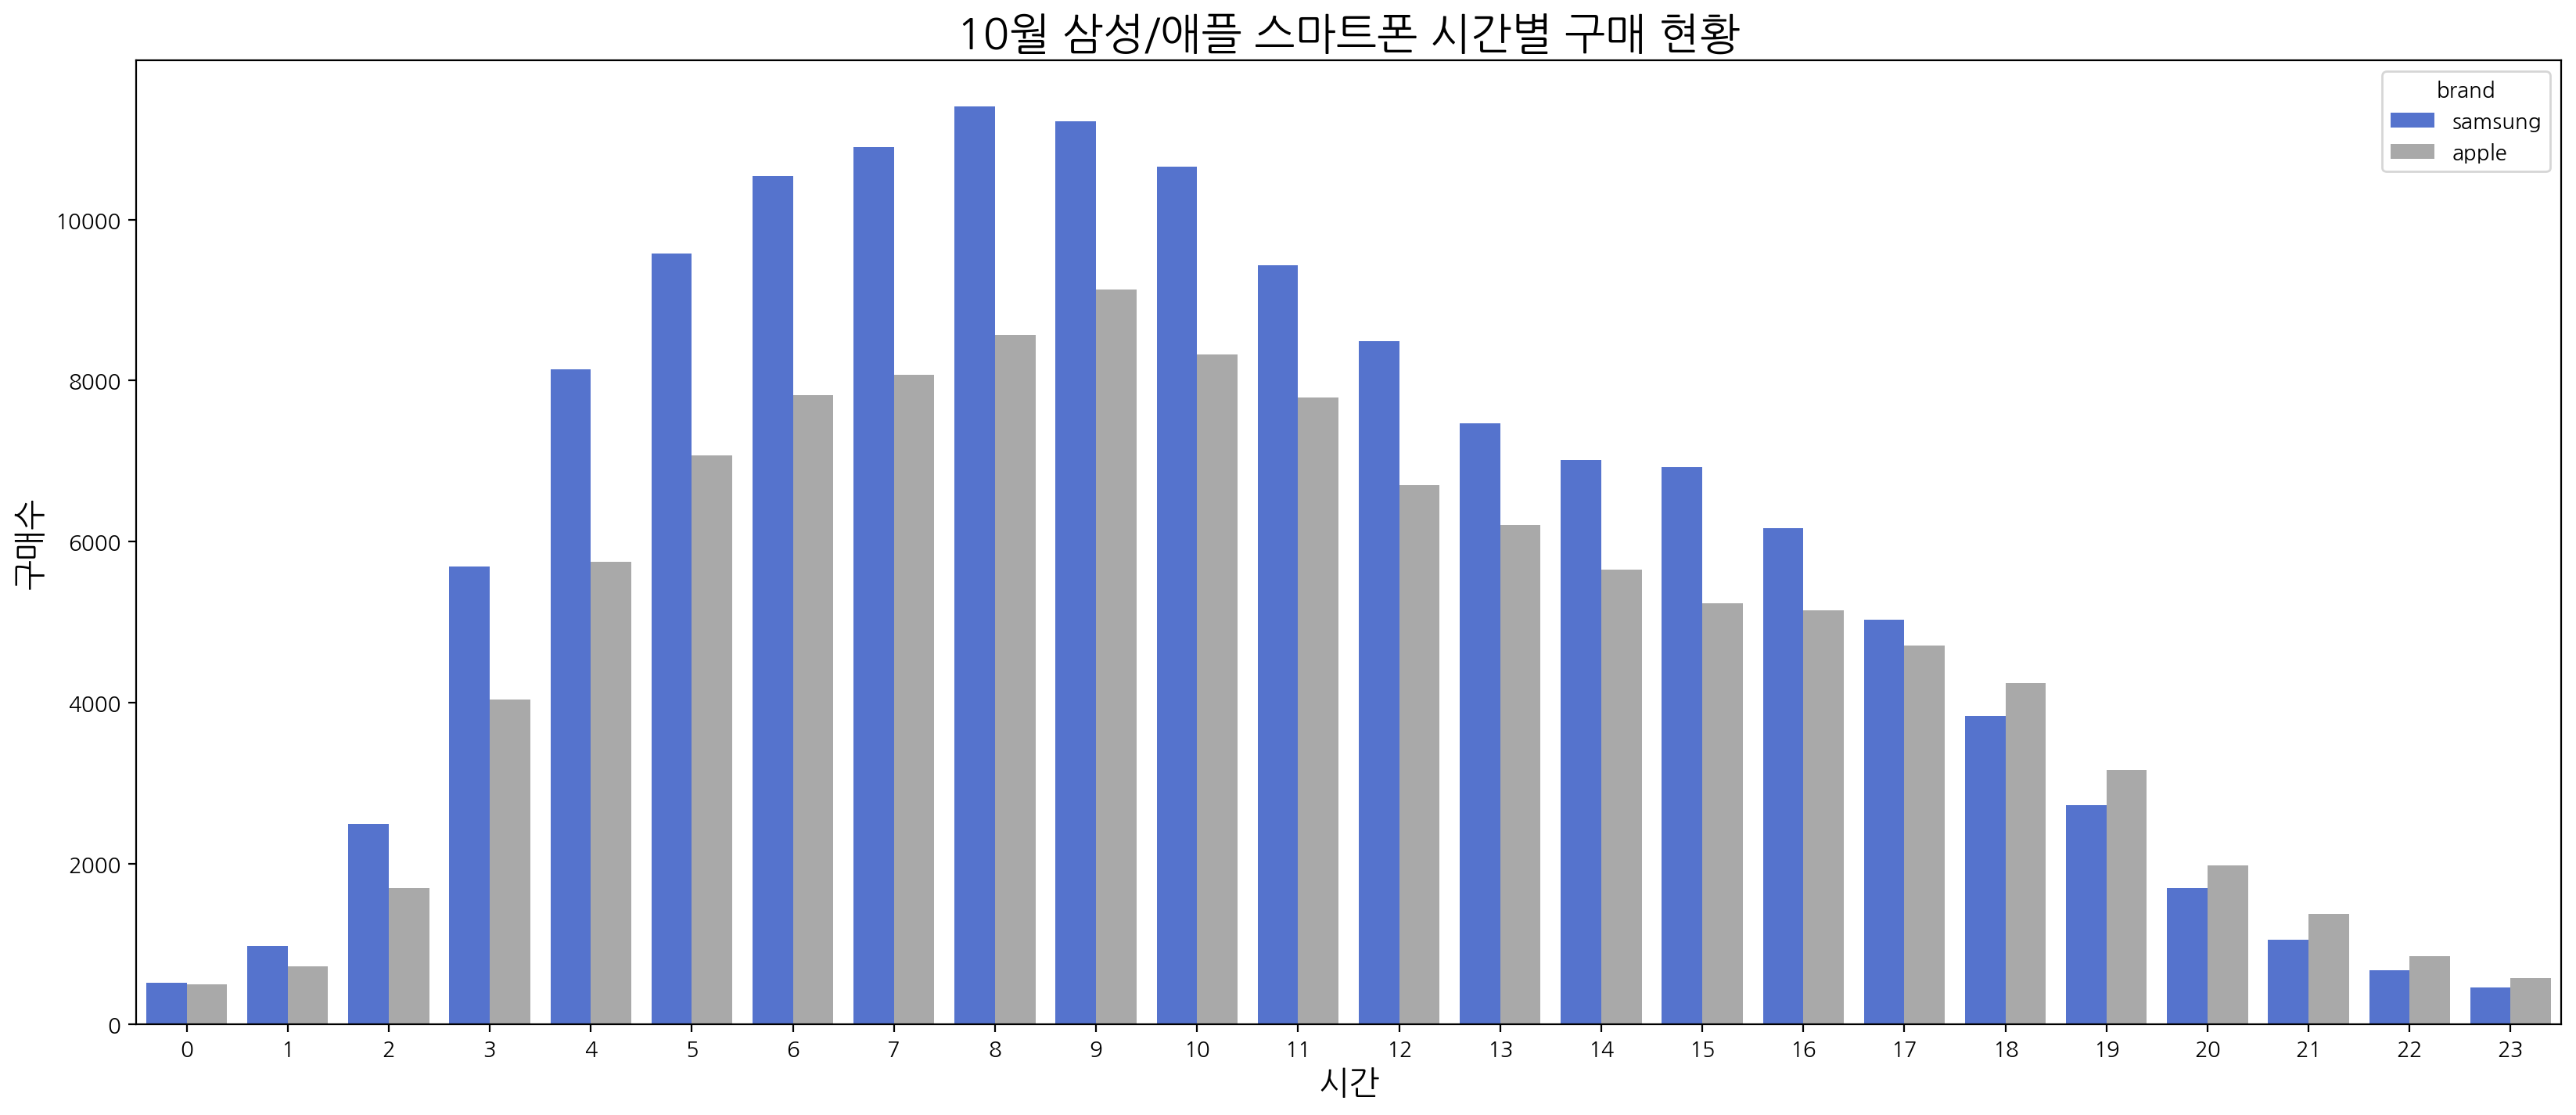

In [26]:
plt.figure(figsize=(20, 8))
colors = ["#4169E1", "#A9A9A9"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(data=all_pur, x="event_time_Hour", hue="brand")
plt.title("10월 삼성/애플 스마트폰 시간별 구매 현황", fontsize=20)
plt.xlabel('시간', fontsize=15)
plt.ylabel('구매수', fontsize=15);

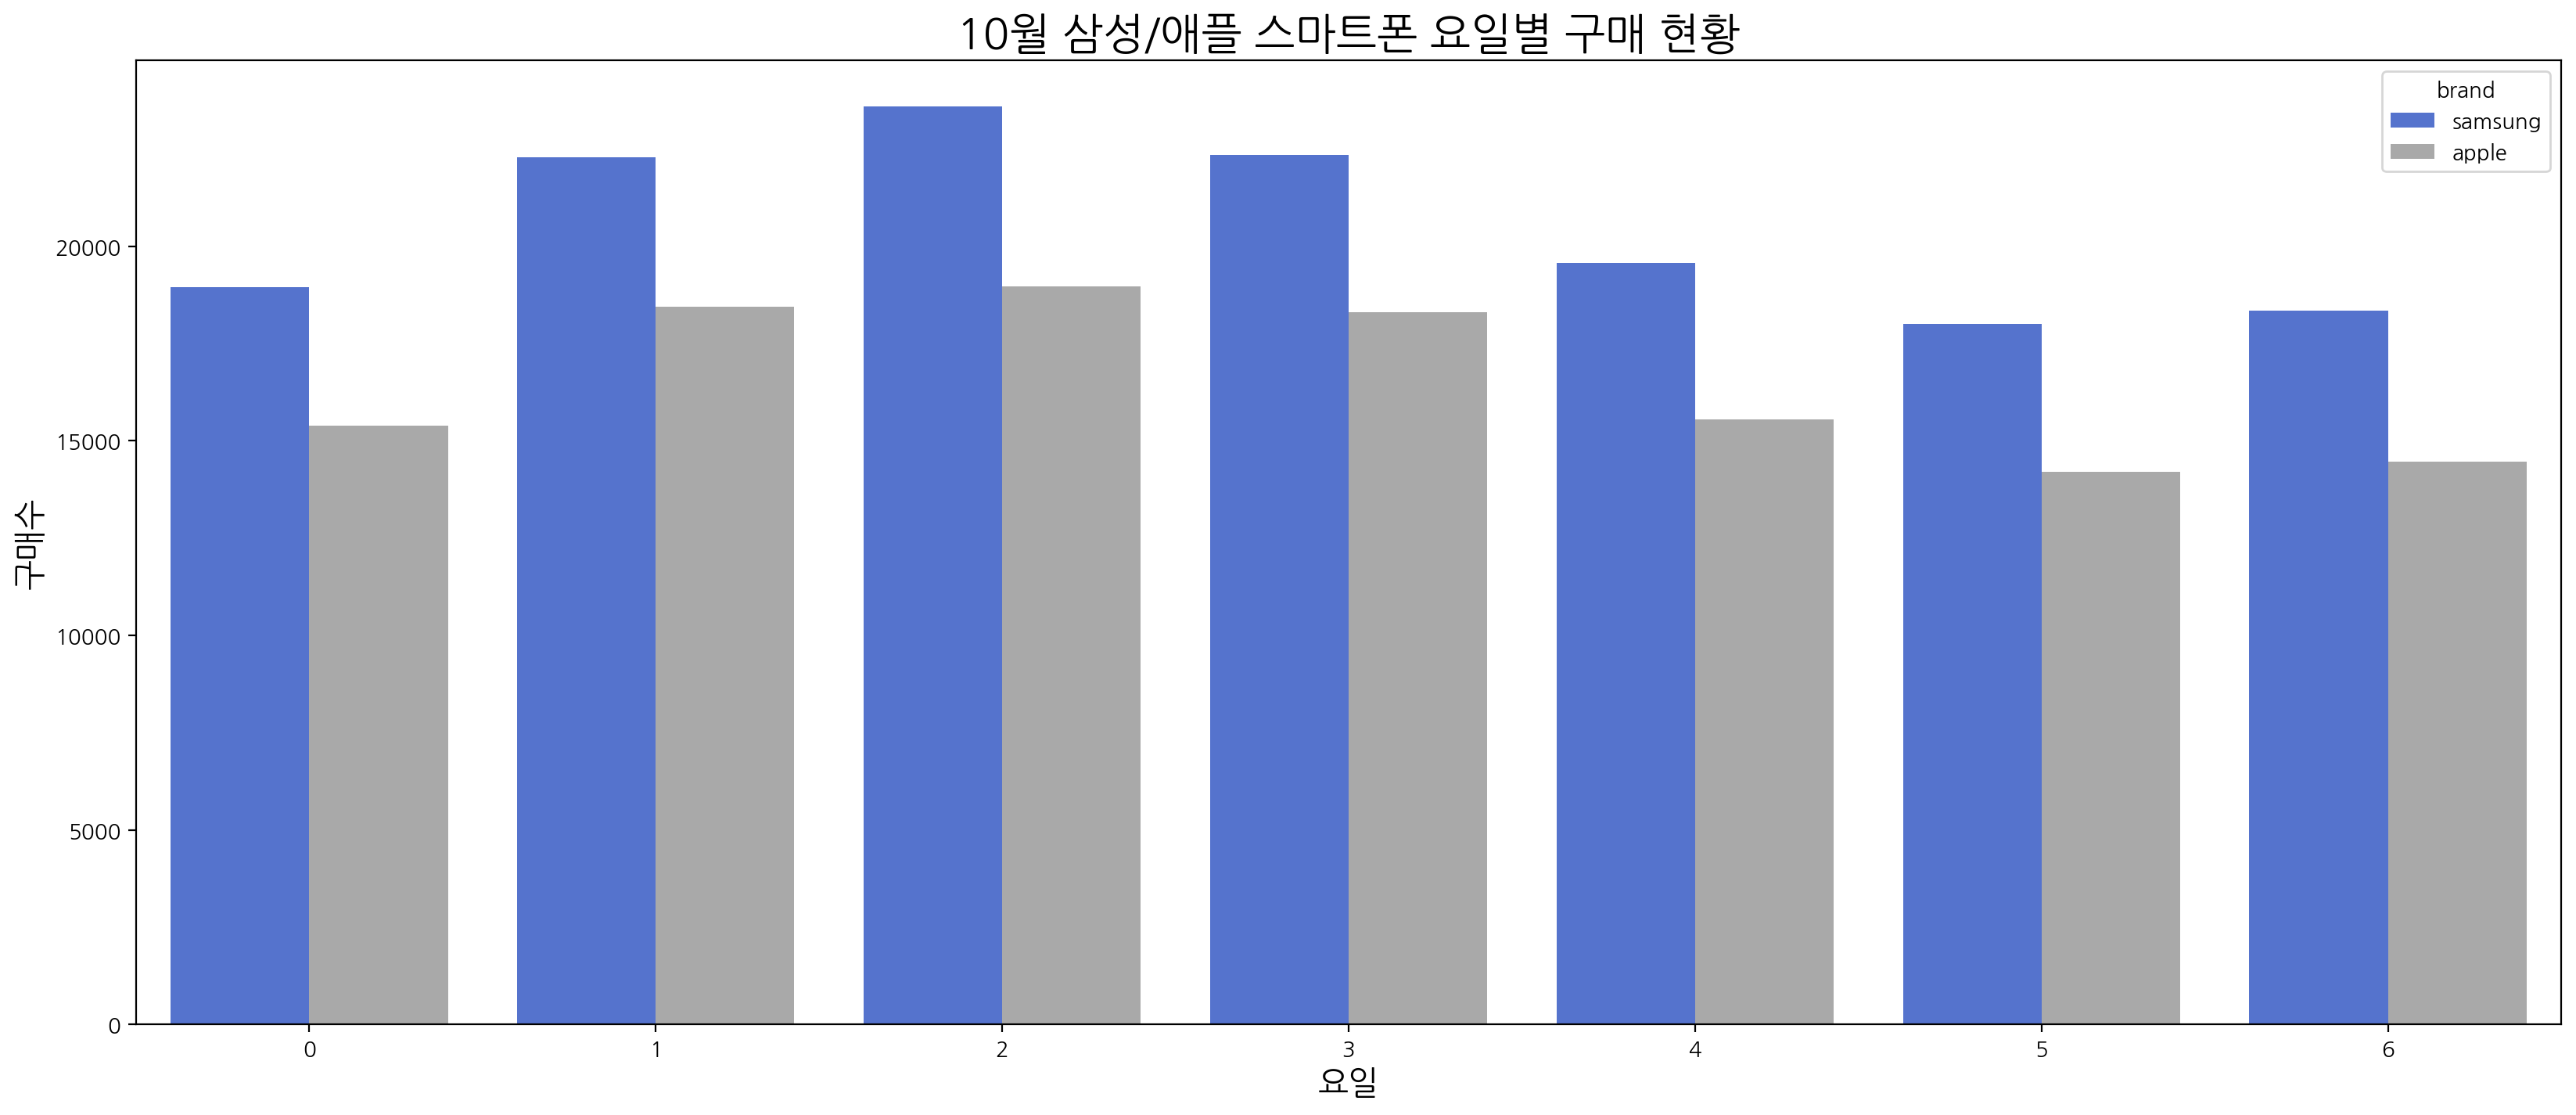

In [27]:
plt.figure(figsize=(20, 8))
colors = ["#4169E1", "#A9A9A9"]
sns.set_palette(sns.color_palette(colors))

sns.countplot(data=all_pur, x="event_time_dow", hue="brand")

plt.title("10월 삼성/애플 스마트폰 요일별 구매 현황", fontsize=20)
plt.xlabel('요일', fontsize=15)
plt.ylabel('구매수', fontsize=15);

----------------------------------------------------------------------------------------- ↓ 시도 중
## 휴대폰을 2번 이상 쇼핑몰에서 구매한 사람들
- 삼성에서 애플로, 애플에서 삼성으로 이동한 사람이 얼마나 있는지
- 삼성만 사는 사람이 있는지
- 애플만 사는 사람이 있는지

In [85]:
# 유저별 휴대폰 구매 횟수가 2 이상인 유저
real_con = all_pur.groupby("user_id").agg({"event_time":"count"}) > 1
real_con

,event_time
user_id,
403013066,True
410333972,False
415873351,True
424869855,False
427391662,False
...,...
566258816,False
566263549,False
566270060,False


In [87]:
# 2번 이상 휴대폰을 구매한 사람 회원 아이디(삼성과 애플 중)
real_user = all_pur.loc[all_pur["user_id"].isin(real_con.index), ["user_id", "event_time", "product_id", "brand", "price",
                                                                  "user_session"]]
real_user = real_user.reset_index()
real_user = real_user.drop("index", axis=1)
real_user

,user_id,event_time,product_id,brand,price,user_session
0,543272936,2019-10-01 00:02:14+00:00,1004856,samsung,130.76,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,551377651,2019-10-01 00:04:37+00:00,1002532,apple,642.69,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,524325294,2019-10-01 00:10:08+00:00,1002524,apple,515.67,0b74a829-f9d7-4654-b5b0-35bc9822c238
3,515246296,2019-10-01 02:19:10+00:00,1004246,apple,736.18,b7dbae4f-cad3-463e-89ce-41990cf48dea
4,555160488,2019-10-01 02:19:34+00:00,1005104,apple,975.57,a1395546-c124-456c-9752-0f5cf883c63d
...,...,...,...,...,...,...
258437,516662286,2019-10-31 23:49:32+00:00,1002524,apple,531.26,d1b46fb7-cf95-4b40-9460-f7abde16c4d3
258438,551781196,2019-10-31 23:50:16+00:00,1004767,samsung,242.63,4b3bb1cc-382f-4909-87fa-81fc9935456c
258439,542774966,2019-10-31 23:53:53+00:00,1004767,samsung,242.63,957dc70c-31d3-42b7-aef0-2d2827c35251
258440,512717356,2019-10-31 23:56:03+00:00,1003306,apple,577.89,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b


In [88]:
real_user.groupby(["user_id", "brand"]).agg({"event_time":"count", "price":"sum"})

event_time    price
user_id   brand                       
403013066 apple             1   577.94
          samsung           1   229.22
410333972 apple             1   591.25
415873351 samsung           2   263.06
424869855 samsung           1    88.29
...                       ...      ...
566258816 samsung           1   128.42
566263549 samsung           1   275.25
566270060 samsung           1    88.29
566274637 apple             1  2011.63
566278294 apple             1  1661.09

[130047 rows x 2 columns]

----------------------------------------------------------------------------------------- ↑ 시도 중

## 삼성 RFM 만들기

In [28]:
last_timestamp = samsung_purc["event_time"].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2019-11-01 23:53:53+0000', tz='UTC')

In [29]:
samsung_purc.info()
samsung_purc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143108 entries, 21 to 3768194
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   event_time        143108 non-null  datetime64[ns, UTC]
 1   product_id        143108 non-null  uint64             
 2   price             143108 non-null  float64            
 3   user_id           143108 non-null  uint64             
 4   user_session      143108 non-null  object             
 5   event_time_Month  143108 non-null  int64              
 6   event_time_Day    143108 non-null  int64              
 7   event_time_dow    143108 non-null  int64              
 8   event_time_Time   143108 non-null  object             
 9   event_time_Hour   143108 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(2), uint64(2)
memory usage: 12.0+ MB


,event_time,product_id,price,user_id,user_session,event_time_Month,event_time_Day,event_time_dow,event_time_Time,event_time_Hour
21,2019-10-01 00:02:14+00:00,1004856,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,10,1,1,00:02:14,0
233,2019-10-01 02:21:02+00:00,1004659,787.18,555168263,d068d08f-aaf3-4949-b031-cdaf49a5c7cf,10,1,1,02:21:02,2
279,2019-10-01 02:22:11+00:00,1004750,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,10,1,1,02:22:11,2
312,2019-10-01 02:23:10+00:00,1004856,130.76,550146179,4078566a-62e6-4258-b623-87812d27aa62,10,1,1,02:23:10,2
328,2019-10-01 02:23:33+00:00,1004870,286.86,513265392,3b94ab59-72ba-49d8-85f8-a6d528870a7c,10,1,1,02:23:33,2


In [30]:
ss_rfm = samsung_purc.groupby("user_id").agg({"event_time" : lambda x : (last_timestamp - x.max()).days,
                                   "price":["count", "sum"]})
ss_rfm.head()

event_time price        
            <lambda> count     sum
user_id                           
403013066         14     1  229.22
415873351          1     2  263.06
424869855          8     1   88.29
427391662         17     1  250.82
430524990          3     1  130.99

In [31]:
ss_rfm.columns = ["Recency", "Frequency", "MonetaryValue"]
ss_rfm

,Recency,Frequency,MonetaryValue
user_id,,,
403013066,14,1,229.22
415873351,1,2,263.06
424869855,8,1,88.29
427391662,17,1,250.82
430524990,3,1,130.99
...,...,...,...
566254545,1,1,275.25
566256165,1,1,275.25
566258816,1,1,128.42


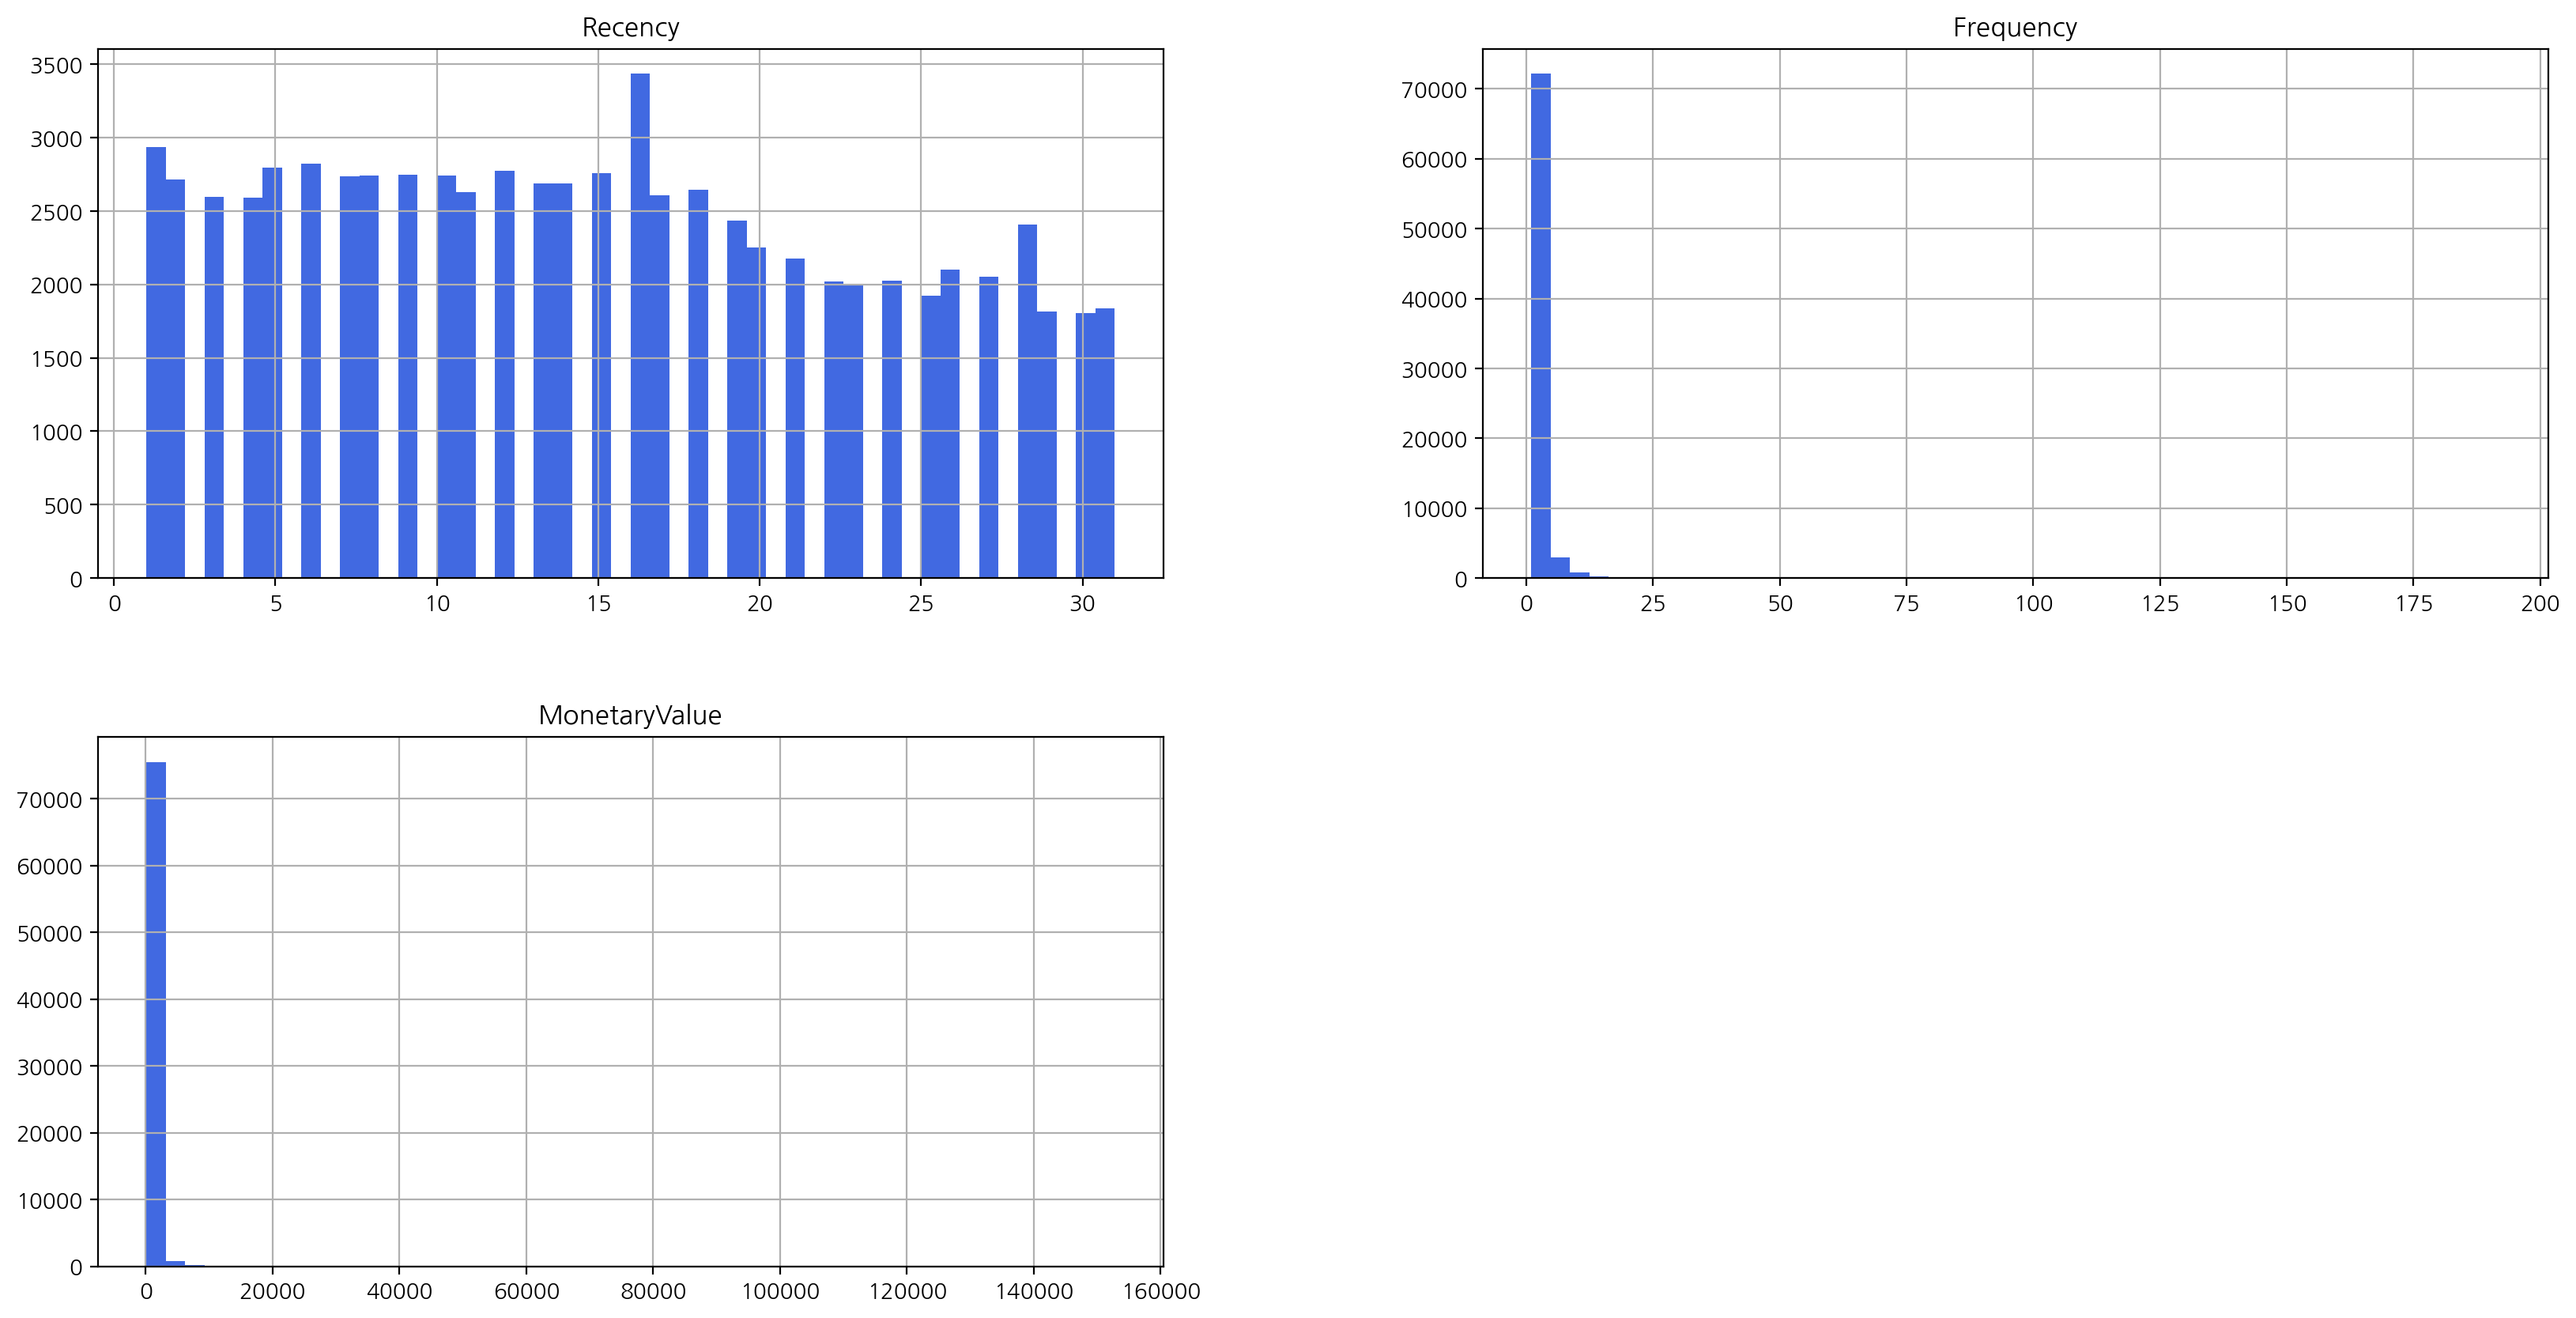

In [32]:
ss_rfm.hist(bins=50, figsize=(20,10));

In [33]:
r_labels = list(range(3, 0, -1))
m_labels = list(range(1, 4))
cut_size = 3

r_cut = pd.qcut(ss_rfm["Recency"], cut_size, labels=r_labels)
m_cut = pd.qcut(ss_rfm["MonetaryValue"], cut_size, labels=m_labels)

In [34]:
print(ss_rfm["Frequency"].min(), ss_rfm["Frequency"].max())

1 192


In [35]:
f_edges = [0, 1, 3, 192]
f_labels = list(range(1,4))
f_cut = pd.cut(ss_rfm["Frequency"], bins=f_edges, labels=f_labels)

In [36]:
ss_rfm = ss_rfm.assign(R=r_cut, F=f_cut, M=m_cut)
ss_rfm 

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
403013066,14,1,229.22,2,1,2
415873351,1,2,263.06,3,2,2
424869855,8,1,88.29,3,1,1
427391662,17,1,250.82,2,1,2
430524990,3,1,130.99,3,1,1
...,...,...,...,...,...,...
566254545,1,1,275.25,3,1,2
566256165,1,1,275.25,3,1,2
566258816,1,1,128.42,3,1,1


In [40]:
ss_rfm["ss_rfm_segment"] = ss_rfm["R"].astype(str) + ss_rfm["F"].astype(str) + ss_rfm["M"].astype(str)
ss_rfm["ss_rfm_segment"]

user_id
403013066    212
415873351    322
424869855    311
427391662    212
430524990    311
            ... 
566254545    312
566256165    312
566258816    311
566263549    312
566270060    311
Name: ss_rfm_segment, Length: 76524, dtype: object

In [38]:
ss_rfm["ss_rfm_score"] = ss_rfm[["R", "F", "M"]].sum(axis=1)
ss_rfm

,Recency,Frequency,MonetaryValue,R,F,M,ss_rfm _segment,ss_rfm_score
user_id,,,,,,,,
403013066,14,1,229.22,2,1,2,212,5
415873351,1,2,263.06,3,2,2,322,7
424869855,8,1,88.29,3,1,1,311,5
427391662,17,1,250.82,2,1,2,212,5
430524990,3,1,130.99,3,1,1,311,5
...,...,...,...,...,...,...,...,...
566254545,1,1,275.25,3,1,2,312,6
566256165,1,1,275.25,3,1,2,312,6
566258816,1,1,128.42,3,1,1,311,5


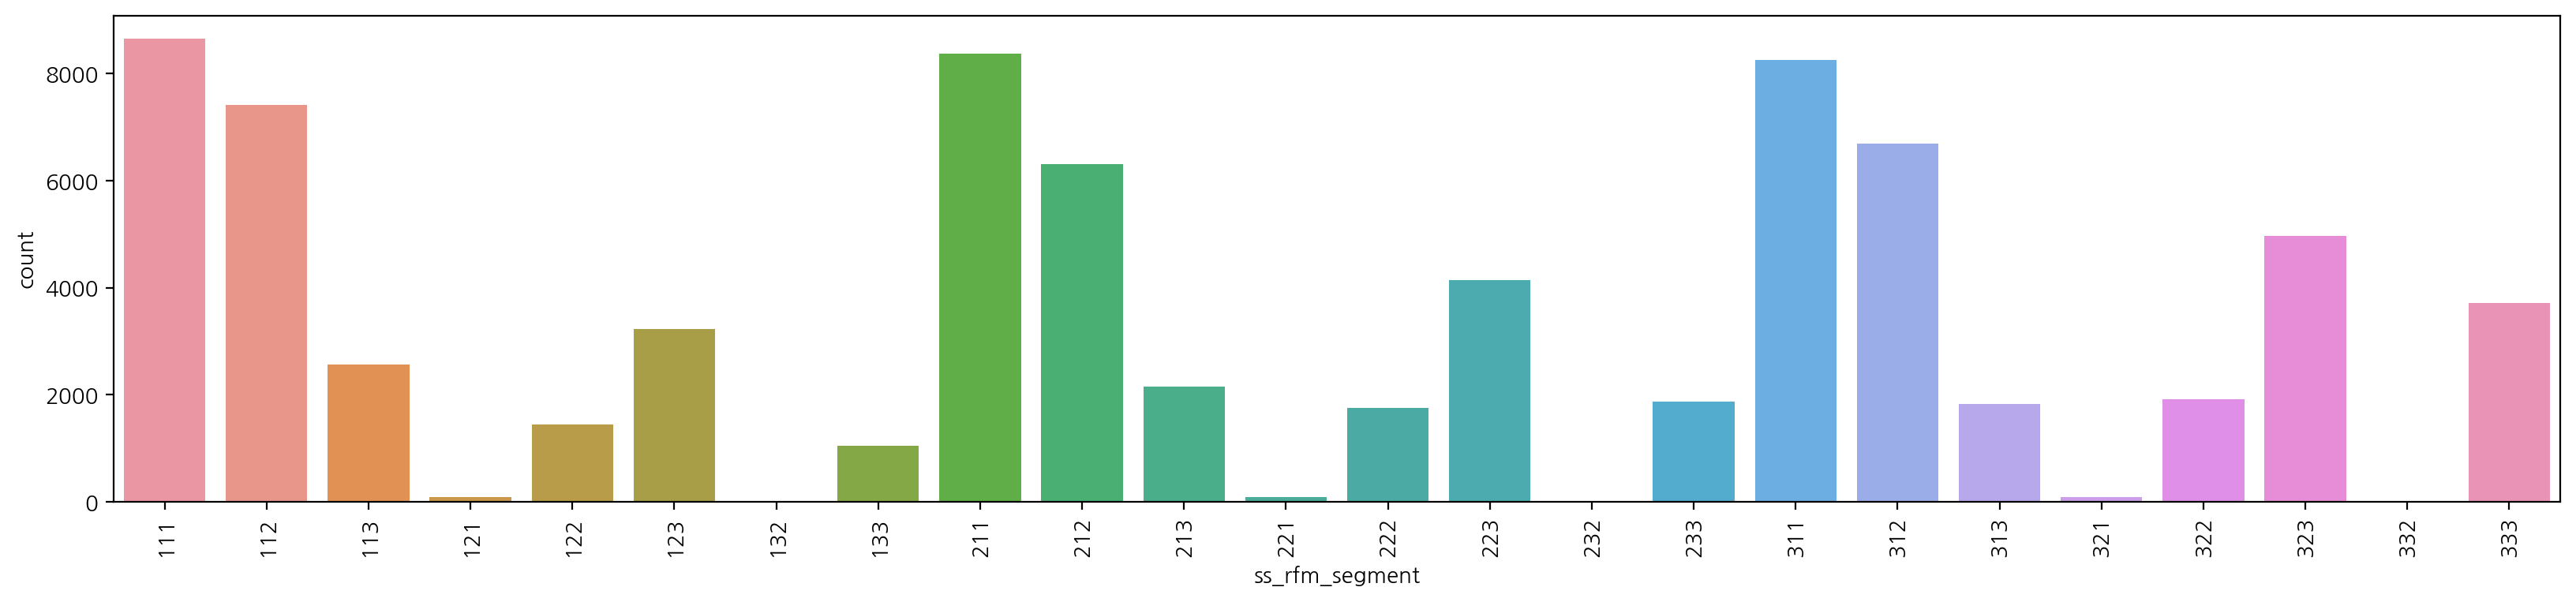

In [41]:
# RFM segment 값에 따라 정렬
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.countplot(data=ss_rfm.sort_values("ss_rfm_segment"), x="ss_rfm_segment");

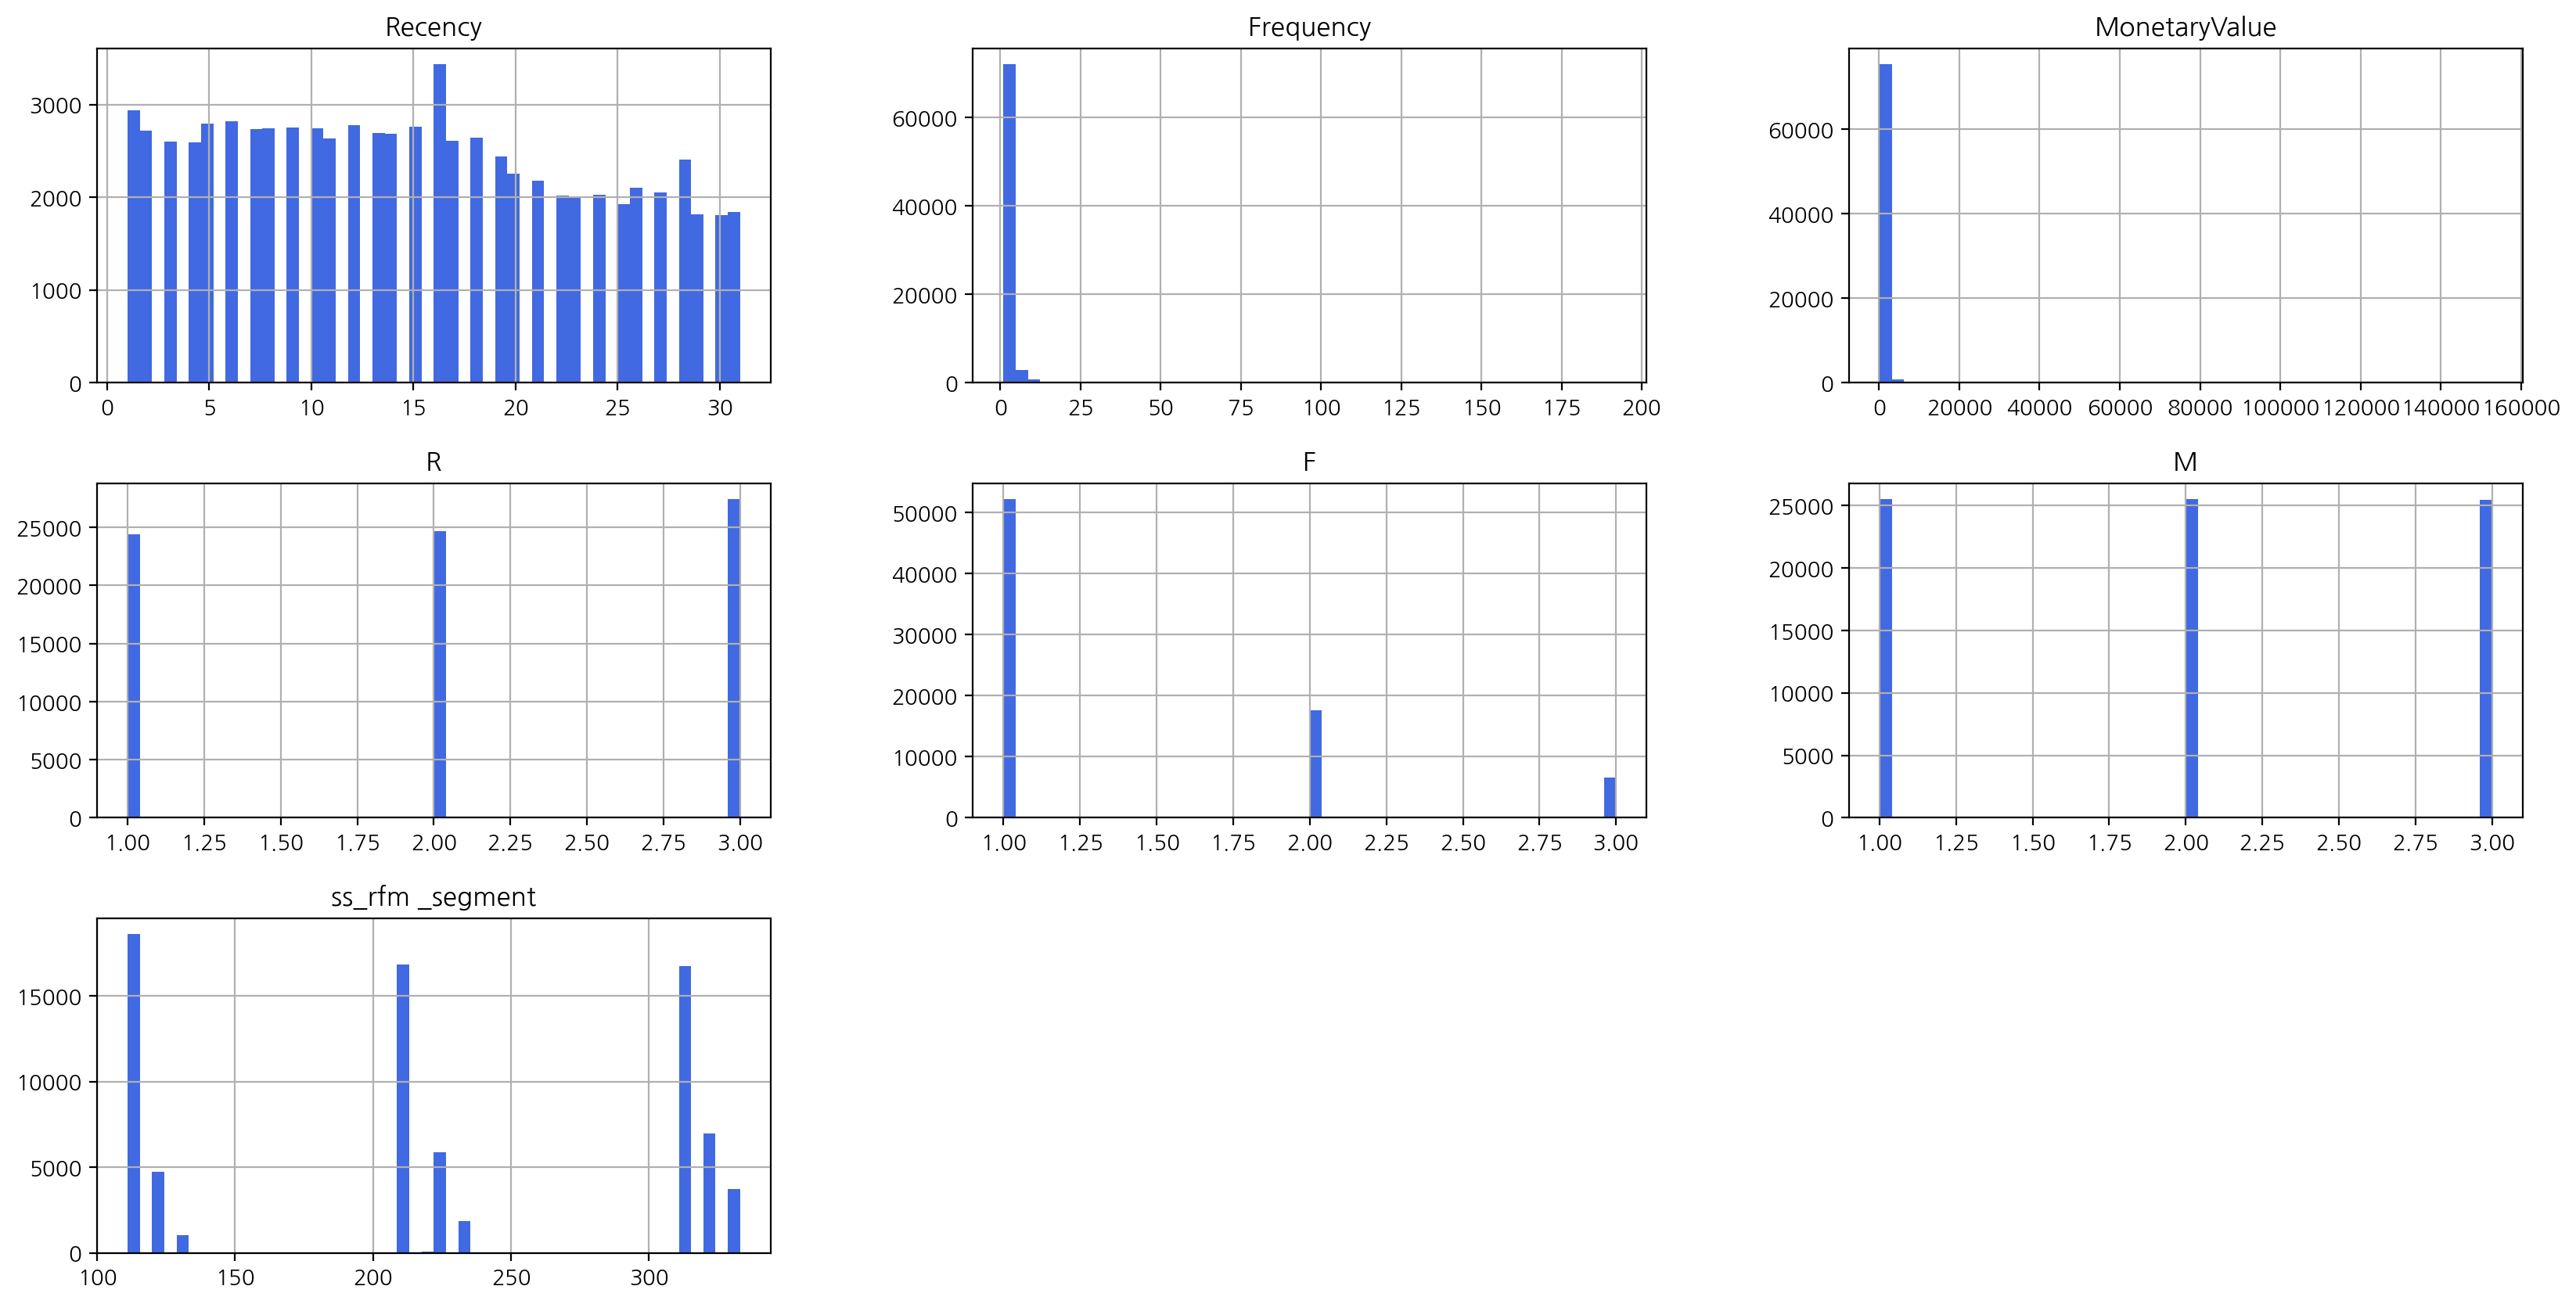

In [42]:
ss_rfm.iloc[:, :-2].astype(float).hist(figsize=(20,10), bins=50);

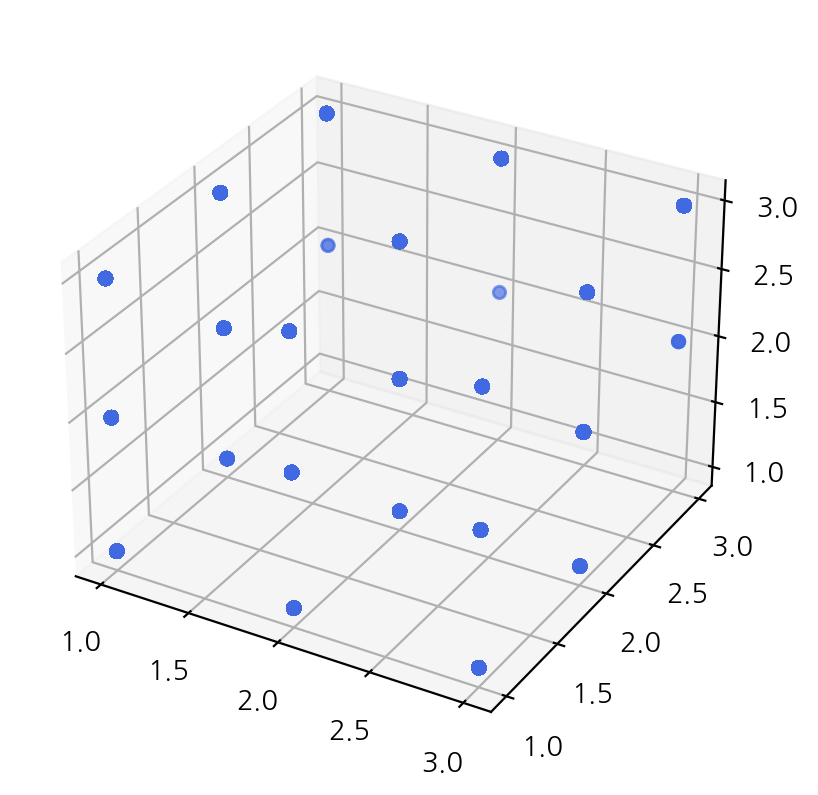

In [43]:
# 3d projection ax.scatter3D rfm["R"], rfm["F"], rfm["M"]
ax = plt.axes(projection='3d')
ax.scatter3D(ss_rfm["R"], ss_rfm["F"], ss_rfm["M"]);

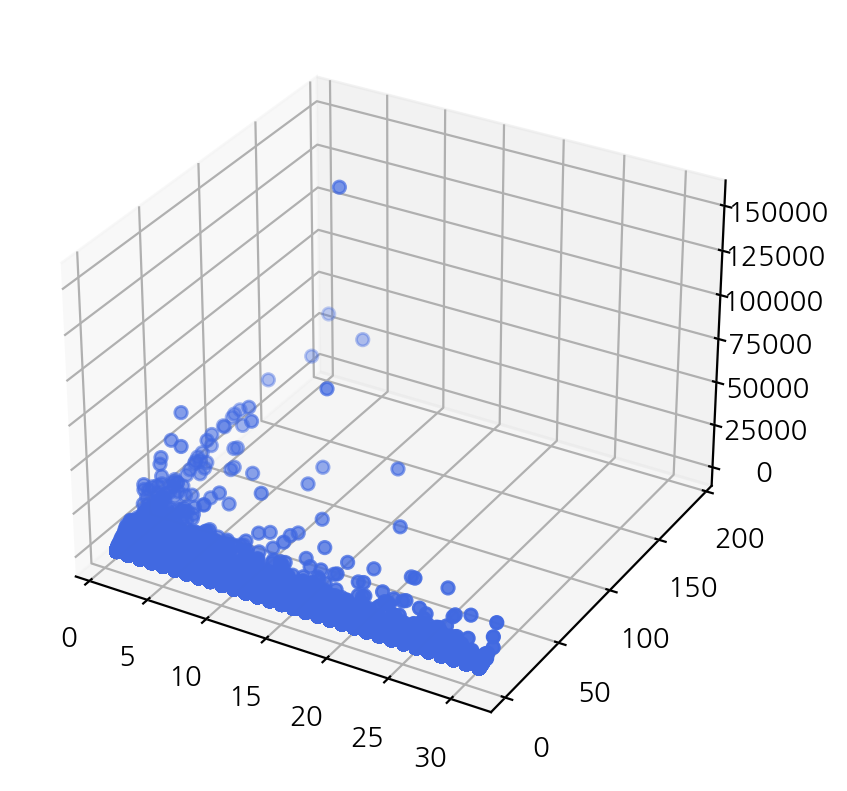

In [44]:
ax = plt.axes(projection='3d')
ax.scatter3D(ss_rfm["Recency"], ss_rfm["Frequency"], ss_rfm["MonetaryValue"]);

In [46]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나누기
labels = ["silver", "gold", "platinum"]
ss_rfm["ss_rfm_class"] = pd.qcut(ss_rfm["ss_rfm_score"], 3, labels)
ss_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,ss_rfm _segment,ss_rfm_score,ss_rfm_segment,ss_rfm_class
user_id,,,,,,,,,,
403013066,14,1,229.22,2,1,2,212,5,212,silver
415873351,1,2,263.06,3,2,2,322,7,322,platinum
424869855,8,1,88.29,3,1,1,311,5,311,silver
427391662,17,1,250.82,2,1,2,212,5,212,silver
430524990,3,1,130.99,3,1,1,311,5,311,silver


In [47]:
# ss_rfm_score에 따라 class가 잘 나뉘어졌는지
ss_rfm.groupby("ss_rfm_class")["ss_rfm_score"].describe()

,count,mean,std,min,25%,50%,75%,max
ss_rfm_class,,,,,,,,
silver,43156.0,4.231347,0.760730,3.0,4.0,4.0,5.0,5.0
gold,13898.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
platinum,19470.0,7.732255,0.759525,7.0,7.0,8.0,8.0,9.0


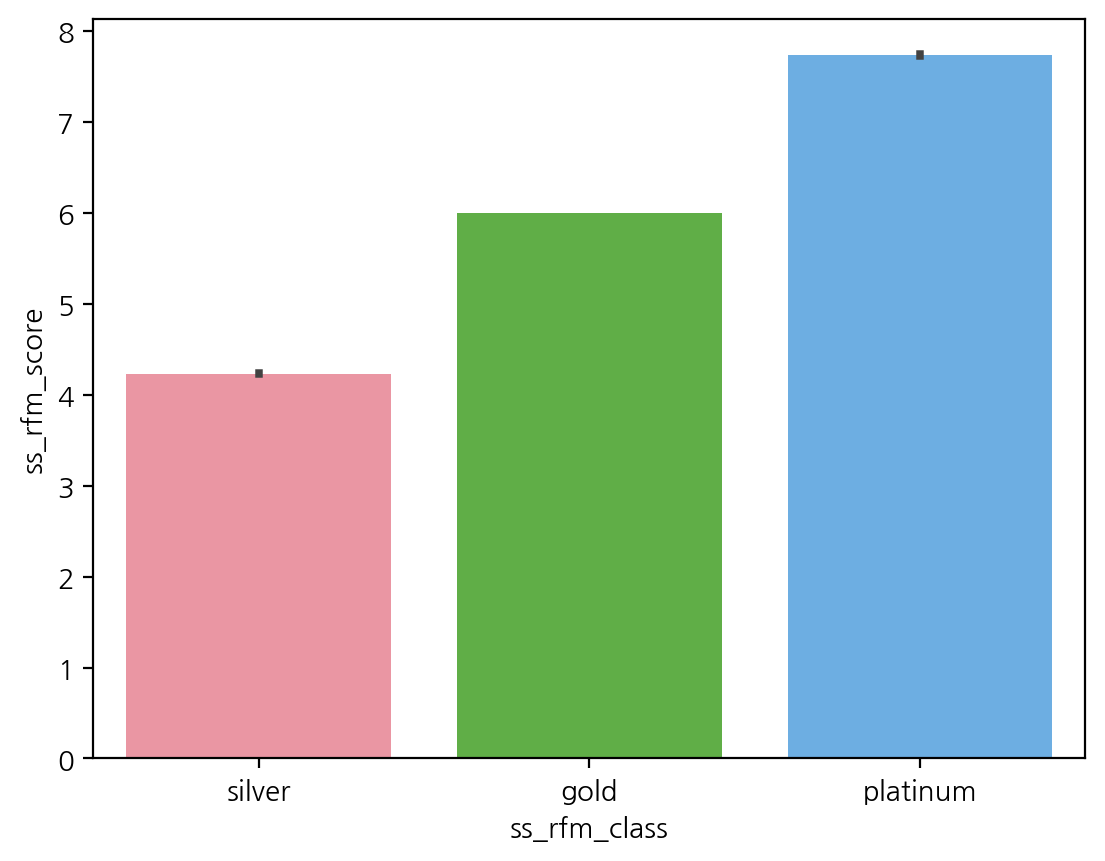

In [49]:
sns.barplot(data=ss_rfm, x="ss_rfm_class", y="ss_rfm_score");

<AxesSubplot:xlabel='R', ylabel='ss_rfm_score'>

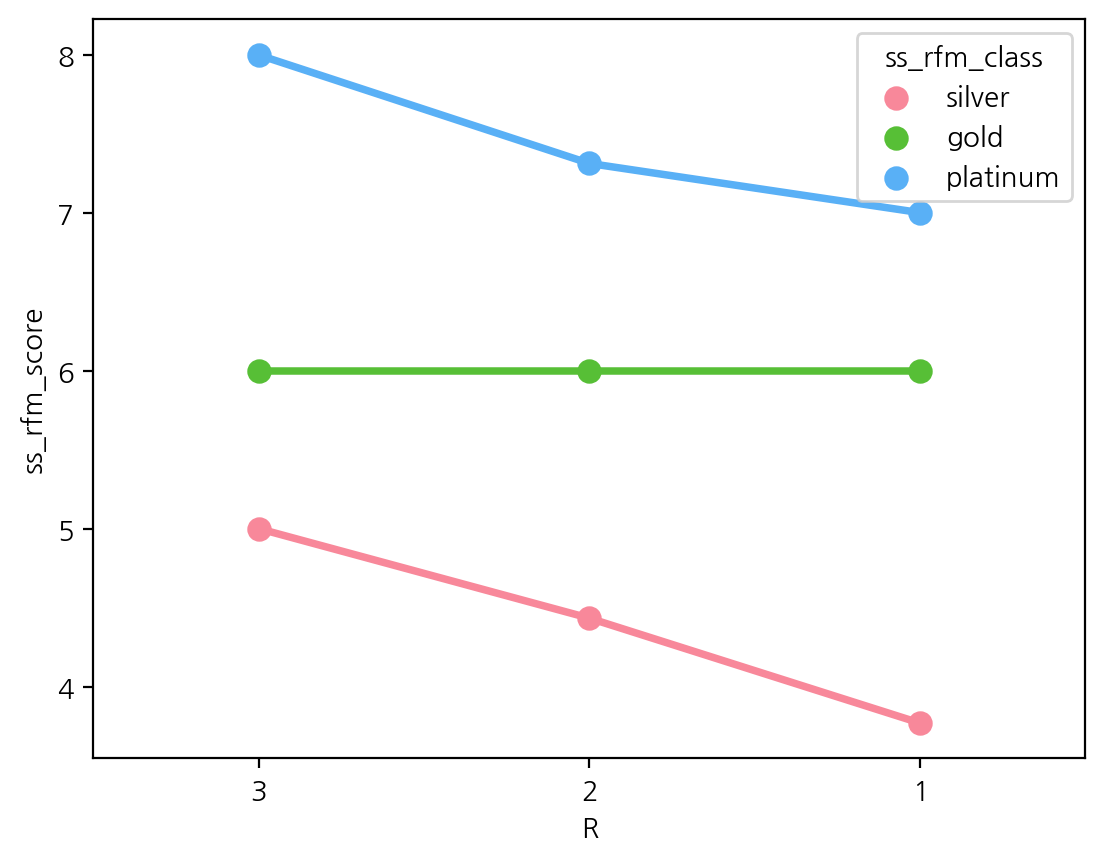

In [50]:
sns.pointplot(data=ss_rfm, x="R", y="ss_rfm_score", hue="ss_rfm_class")

<AxesSubplot:xlabel='F', ylabel='ss_rfm_score'>

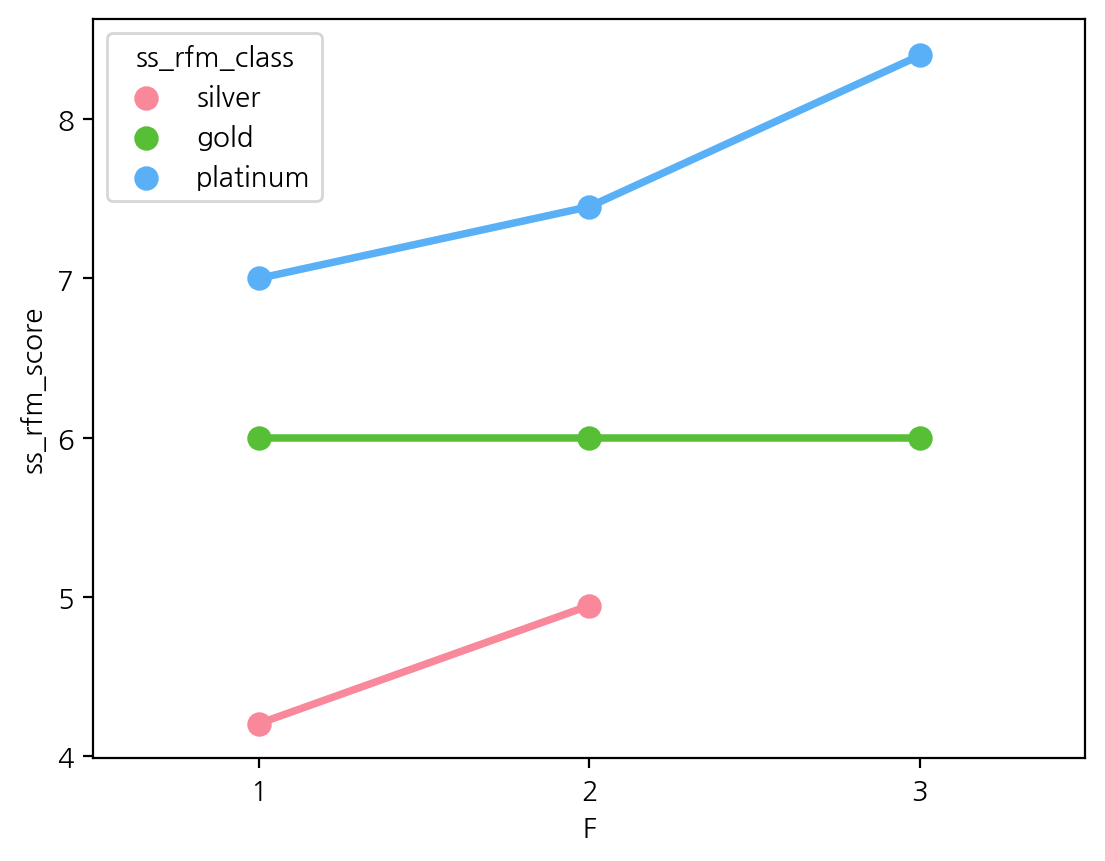

In [52]:
sns.pointplot(data=ss_rfm, x="F", y="ss_rfm_score", hue="ss_rfm_class")

<AxesSubplot:xlabel='M', ylabel='ss_rfm_score'>

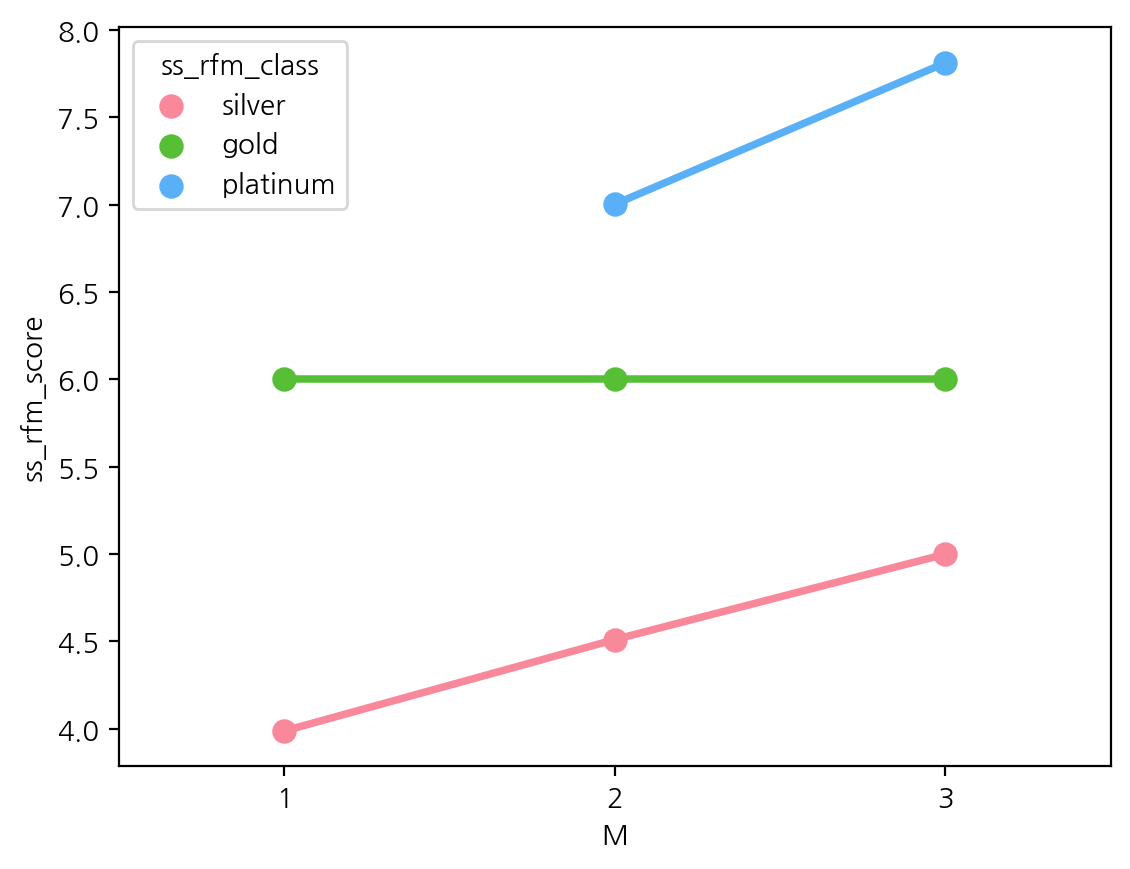

In [53]:
sns.pointplot(data=ss_rfm, x="M", y="ss_rfm_score", hue="ss_rfm_class")

In [45]:
re_co = ss_rfm.corr(numeric_only=True)
re_co

,Recency,Frequency,MonetaryValue,ss_rfm_score
Recency,1.000000,-0.140513,-0.107407,-0.581811
Frequency,-0.140513,1.000000,0.758625,0.429995
MonetaryValue,-0.107407,0.758625,1.000000,0.367994
ss_rfm_score,-0.581811,0.429995,0.367994,1.000000
